# Setup

In [17]:
import warnings

import numpy as np
from matplotlib import pyplot as plt

from compare_variance_residual.simulated.plotting import plot_experiment
from compare_variance_residual.simulated.simulation import run_experiment

warnings.simplefilter(action='ignore')
plt.style.use('ggplot')

In [18]:
from himalaya.backend import set_backend

backend = set_backend("cupy", on_error="warn")

# Set default values to be used in the tests

In [19]:
n_observations = 10

variables = dict(
    # dataset
    n_runs=100,
    unique_contributions=[0.3, 0.3],
    n_features_list=[100, 100],
    n_targets=100,
    n_samples_train=100,
    n_samples_test=50,
    noise_level=0.0,
    random_distribution="normal",

    # ridge regression
    alphas=np.logspace(-10, 10, 41),
    cv=10,

    # method parameters
    direct_variance_partitioning=True,
    ignore_negative_r2=False,
    use_ols=False,
)

# Varying distributions

In [20]:
variable_name = "sampling distribution"
random_distributions = ["normal", "uniform", "exponential", "gamma", "beta", "poisson", "lognormal", "pareto"]

In [21]:
predicted_variance, predicted_residual = run_experiment(random_distributions, variable_name, **variables)

[........................................] 100% | 522.08 sec | Varying sampling distribution | 


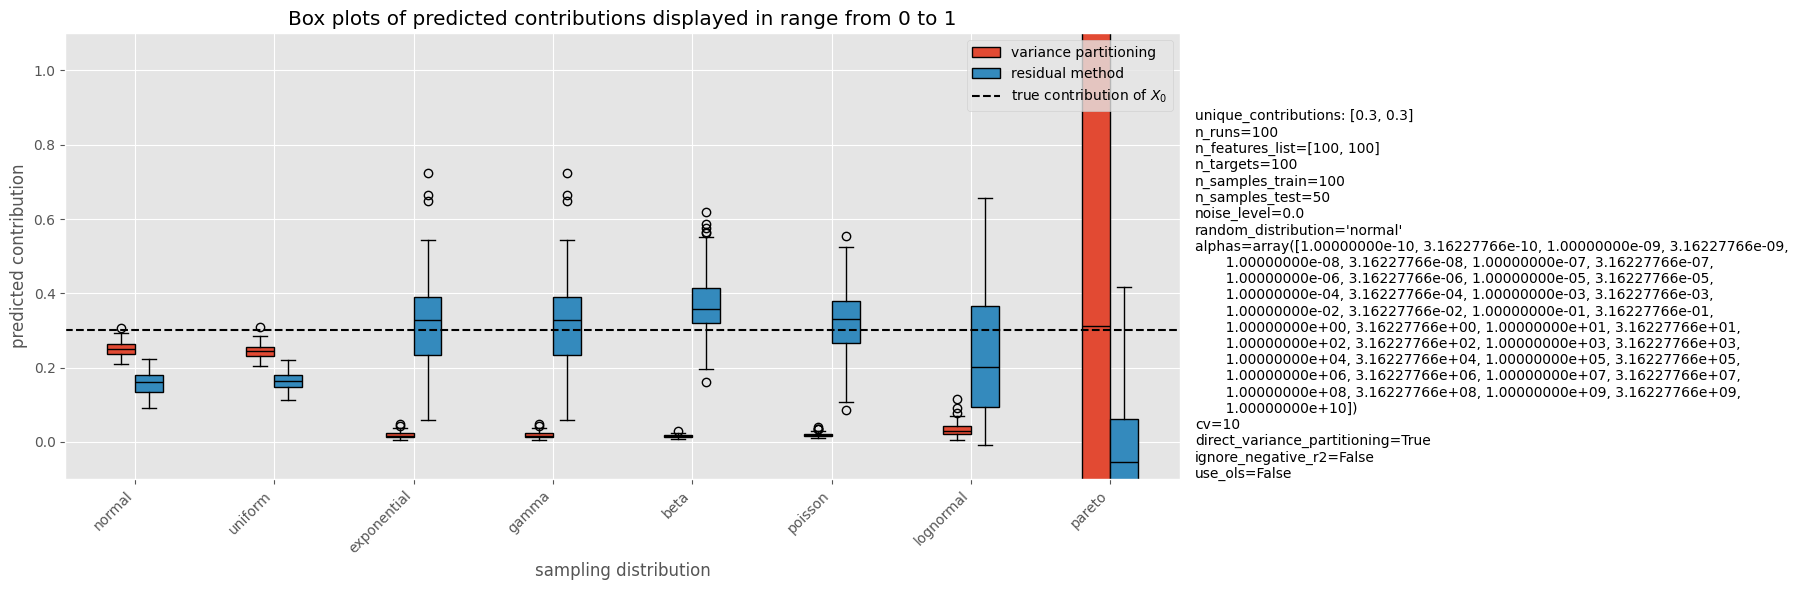

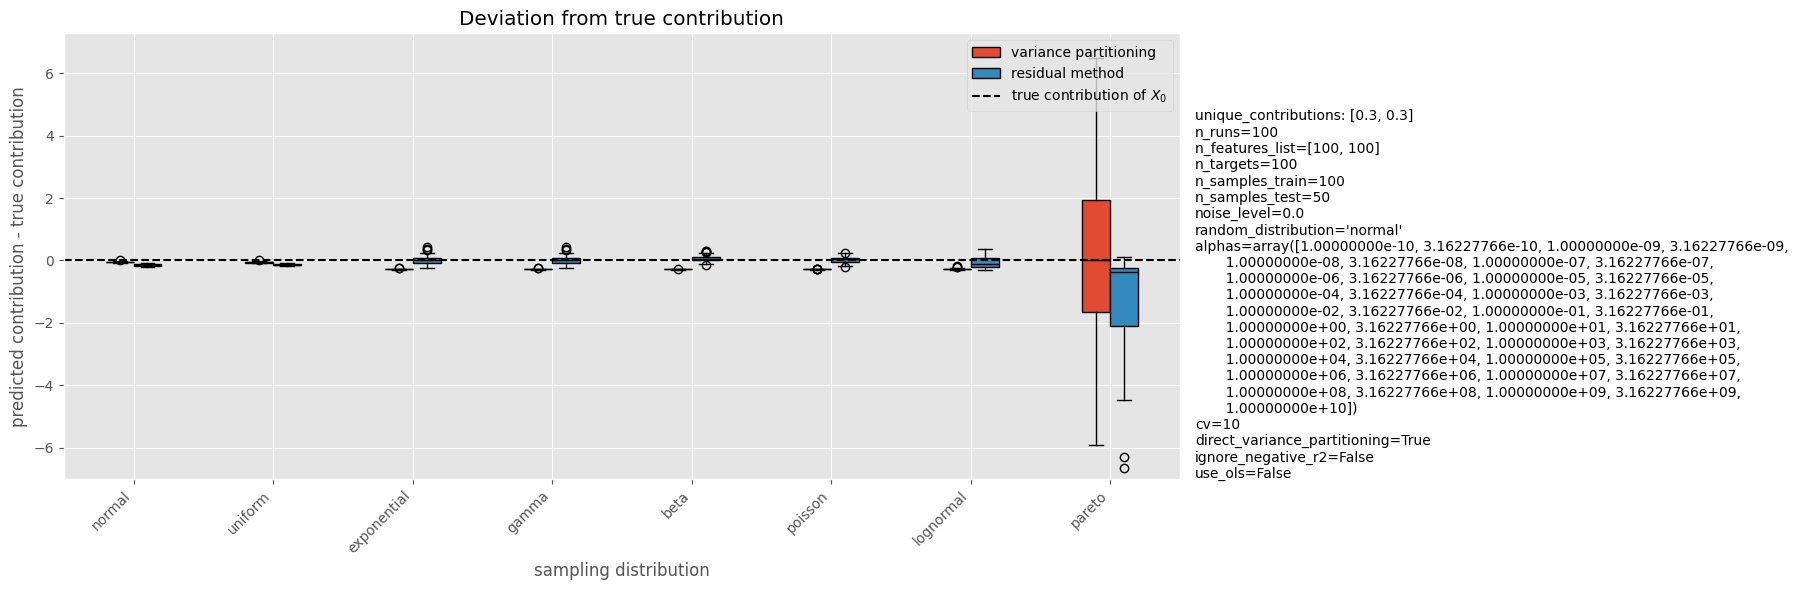

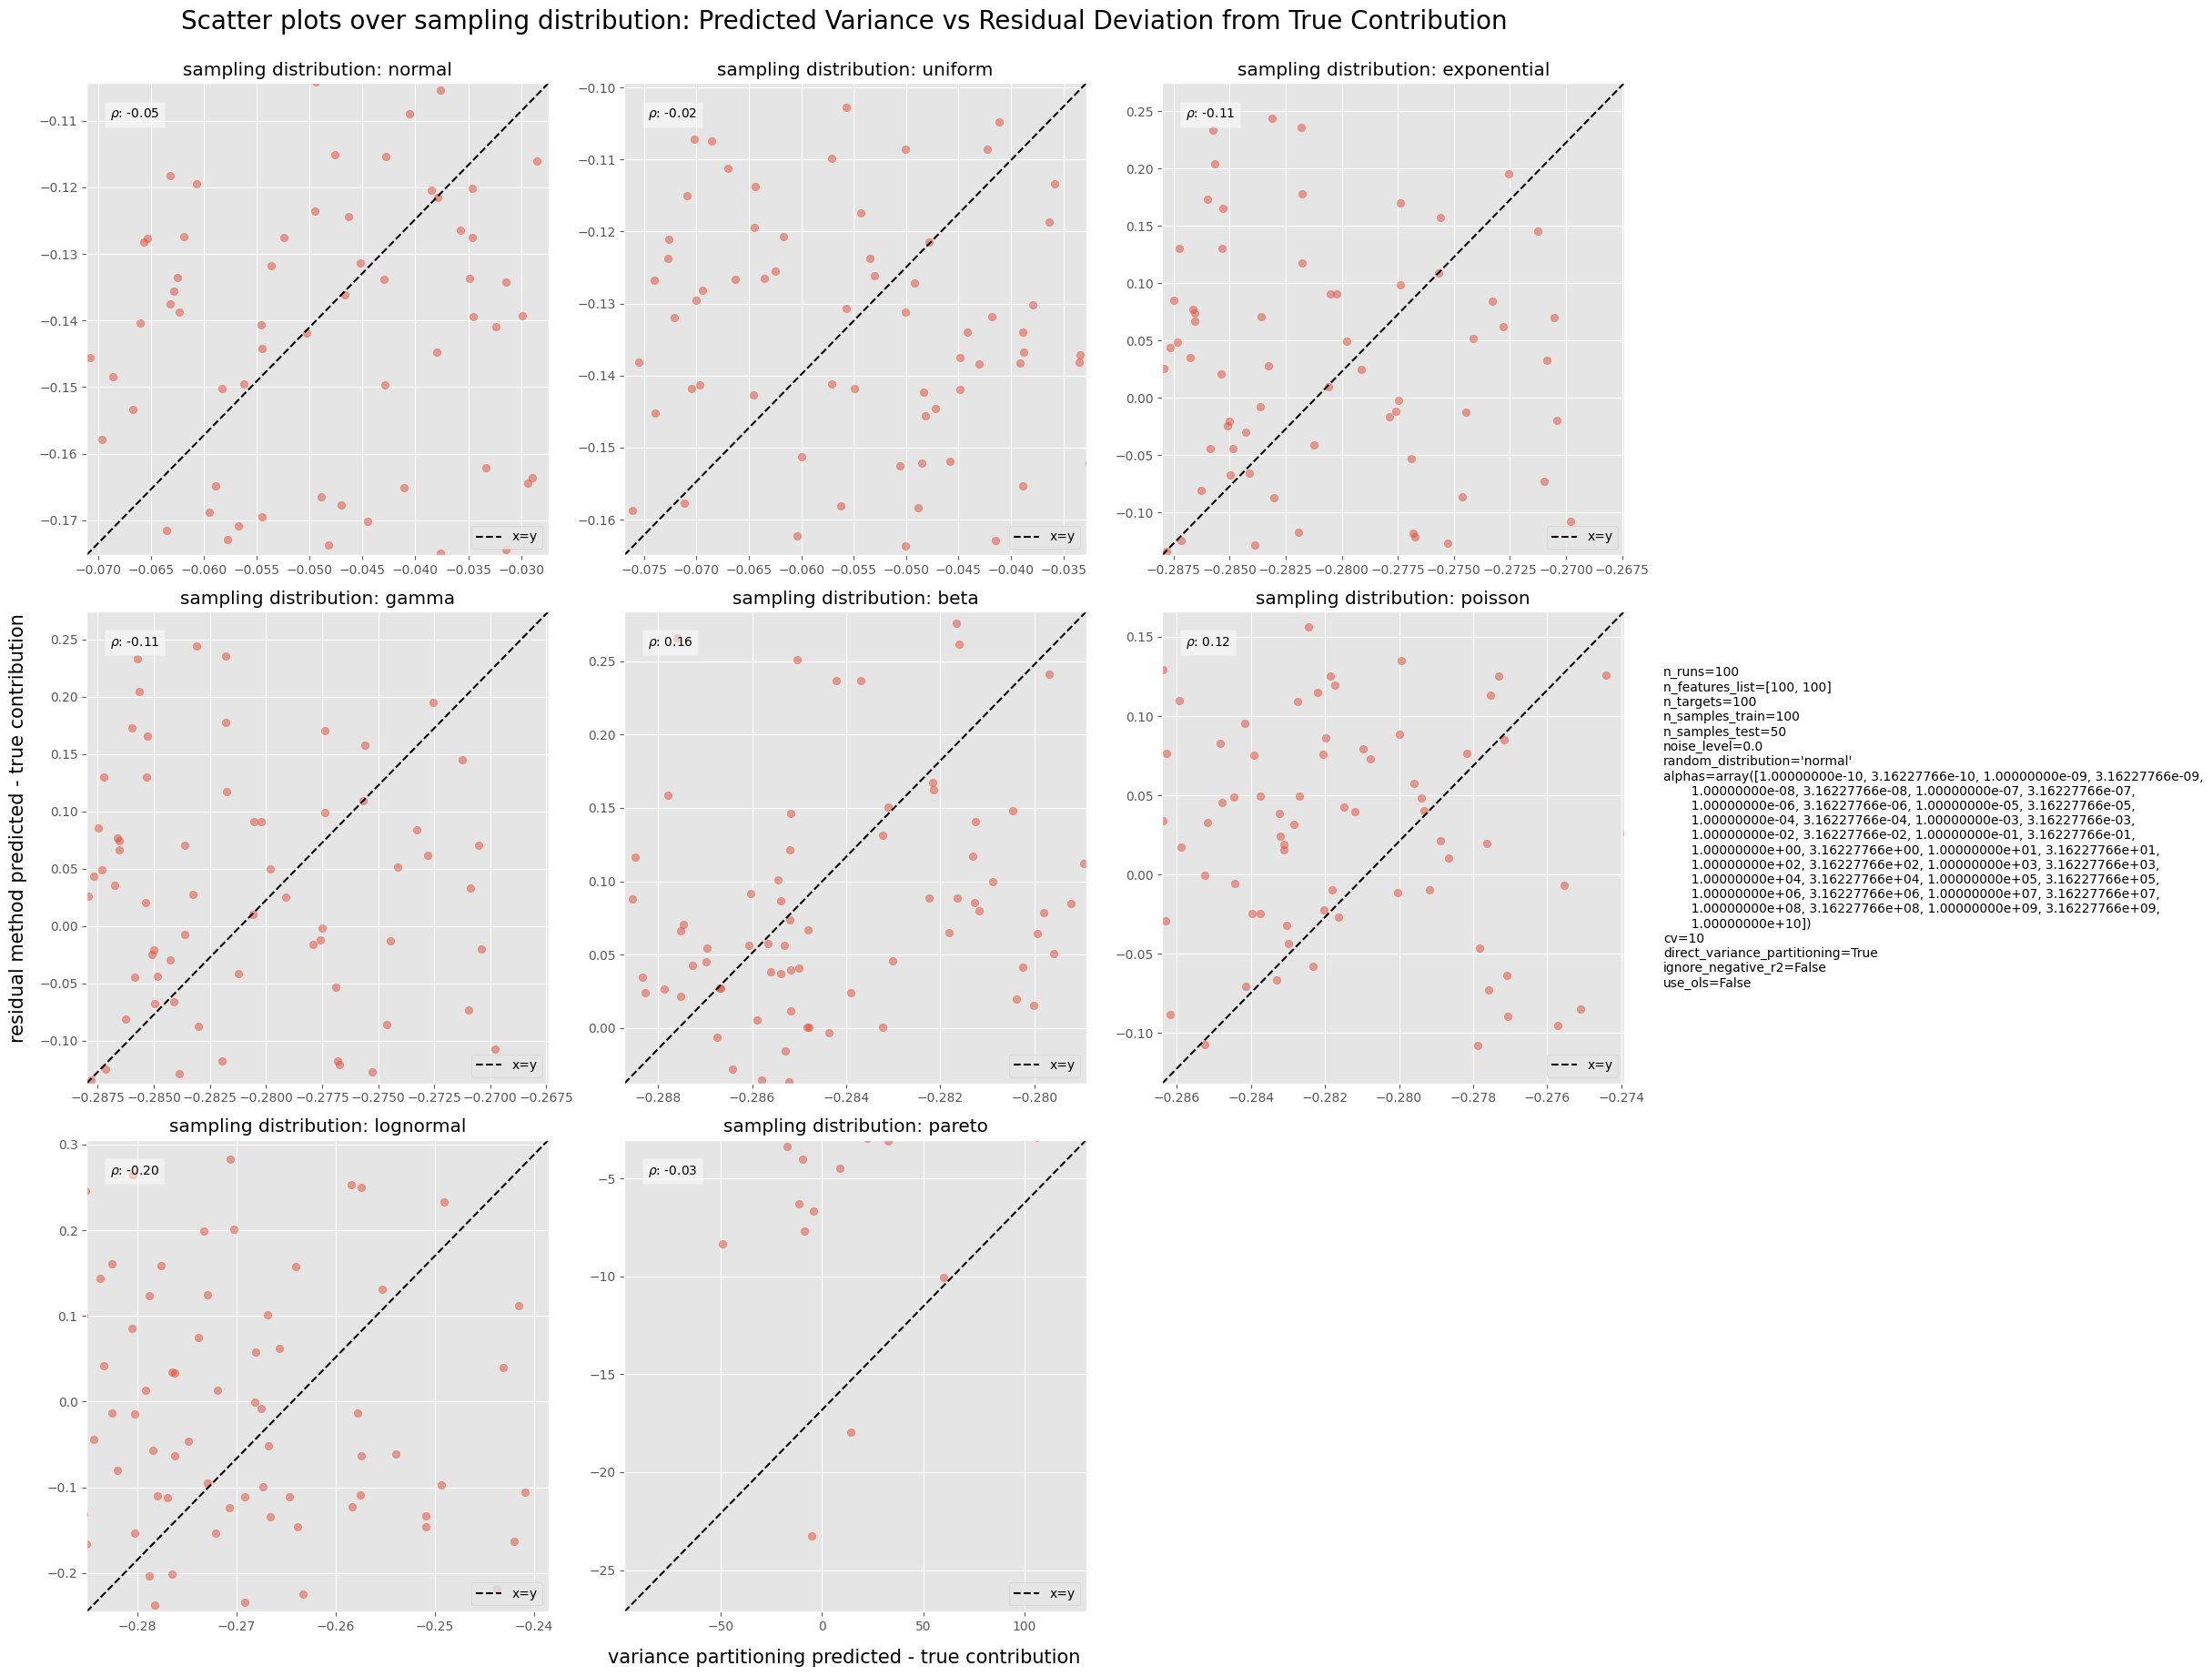

In [22]:
plot_experiment(random_distributions, variable_name, predicted_variance, predicted_residual, **variables)

# Test varying sample sizes

In [23]:
sample_sizes = np.logspace(1, 3, n_observations)

## varying train sample sizes

In [24]:
variable_name = "sample size training"

In [25]:
predicted_variance, predicted_residual = run_experiment(sample_sizes, variable_name, **variables)

[........................................] 100% | 778.61 sec | Varying sample size training | 


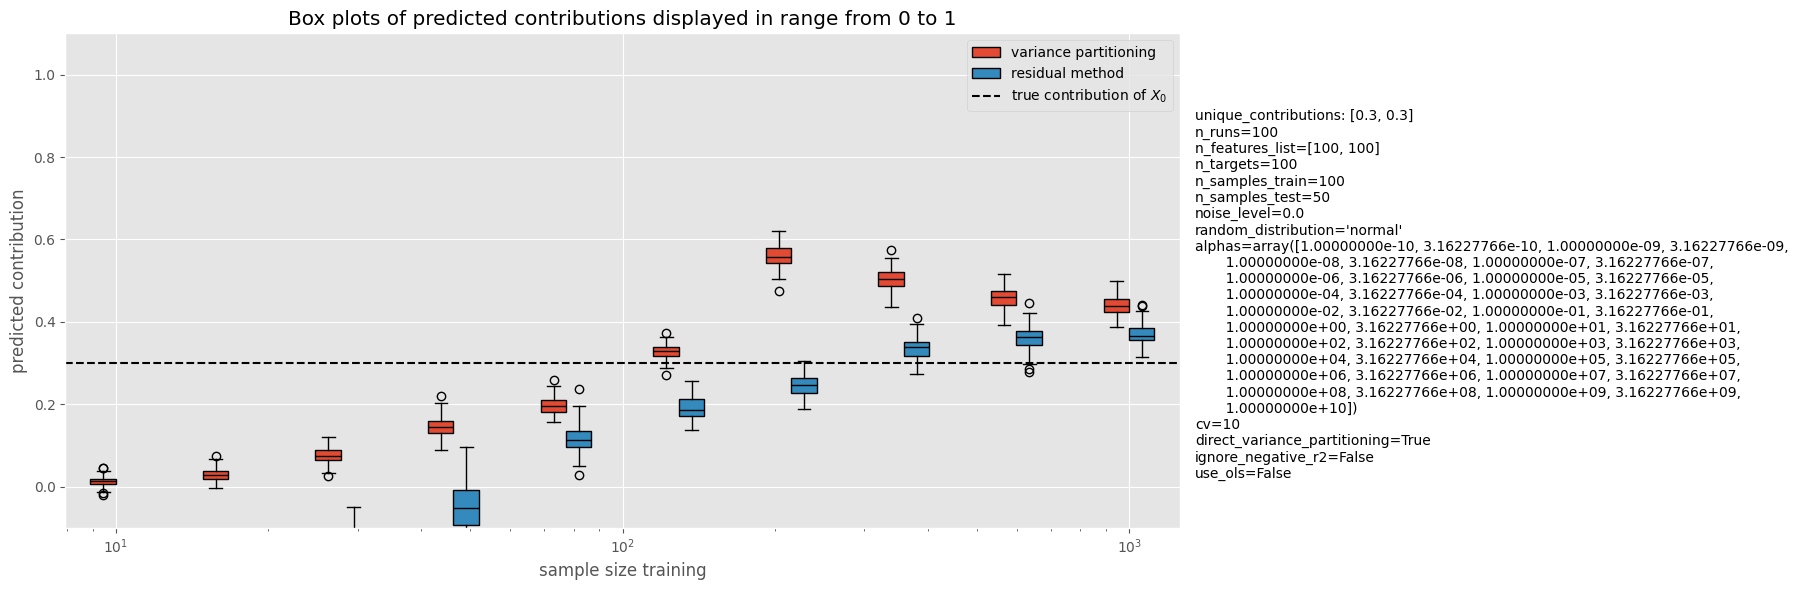

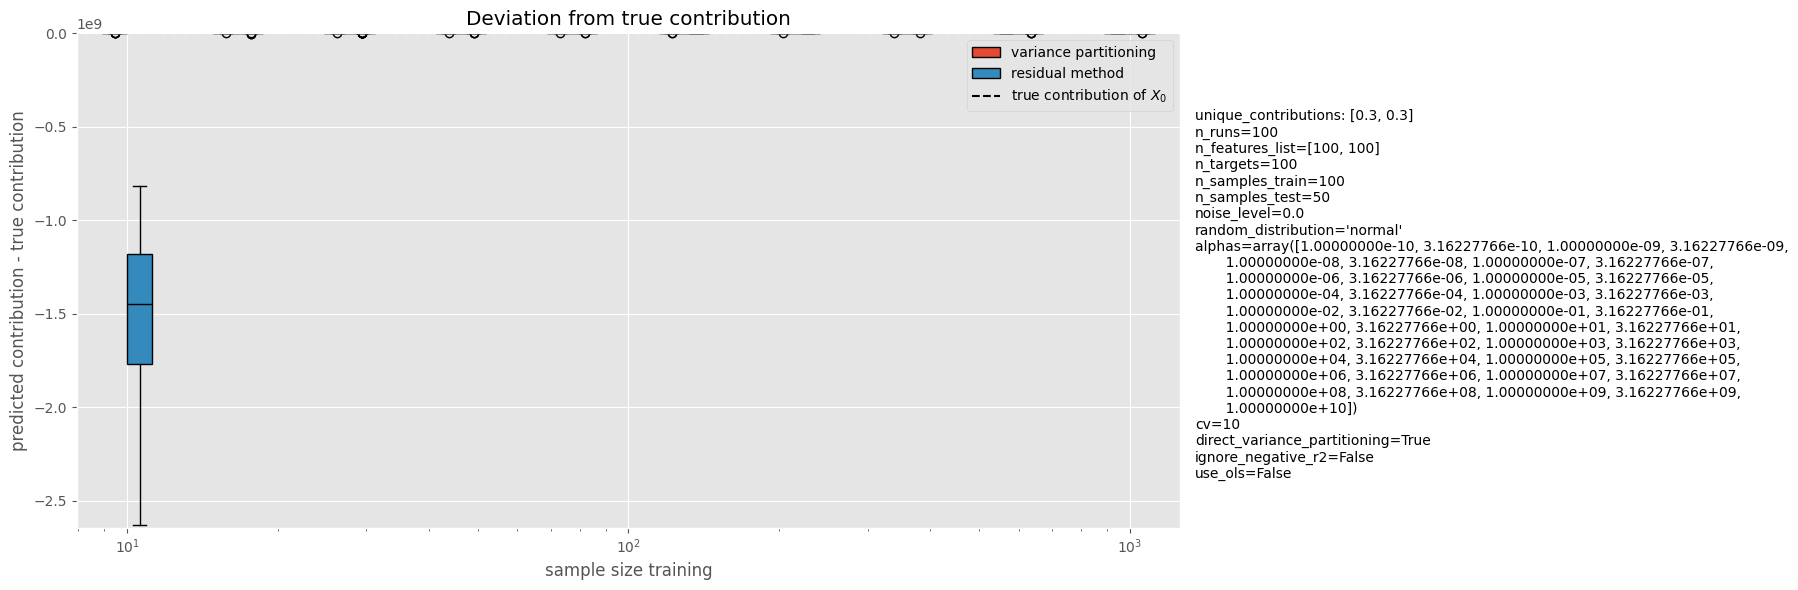

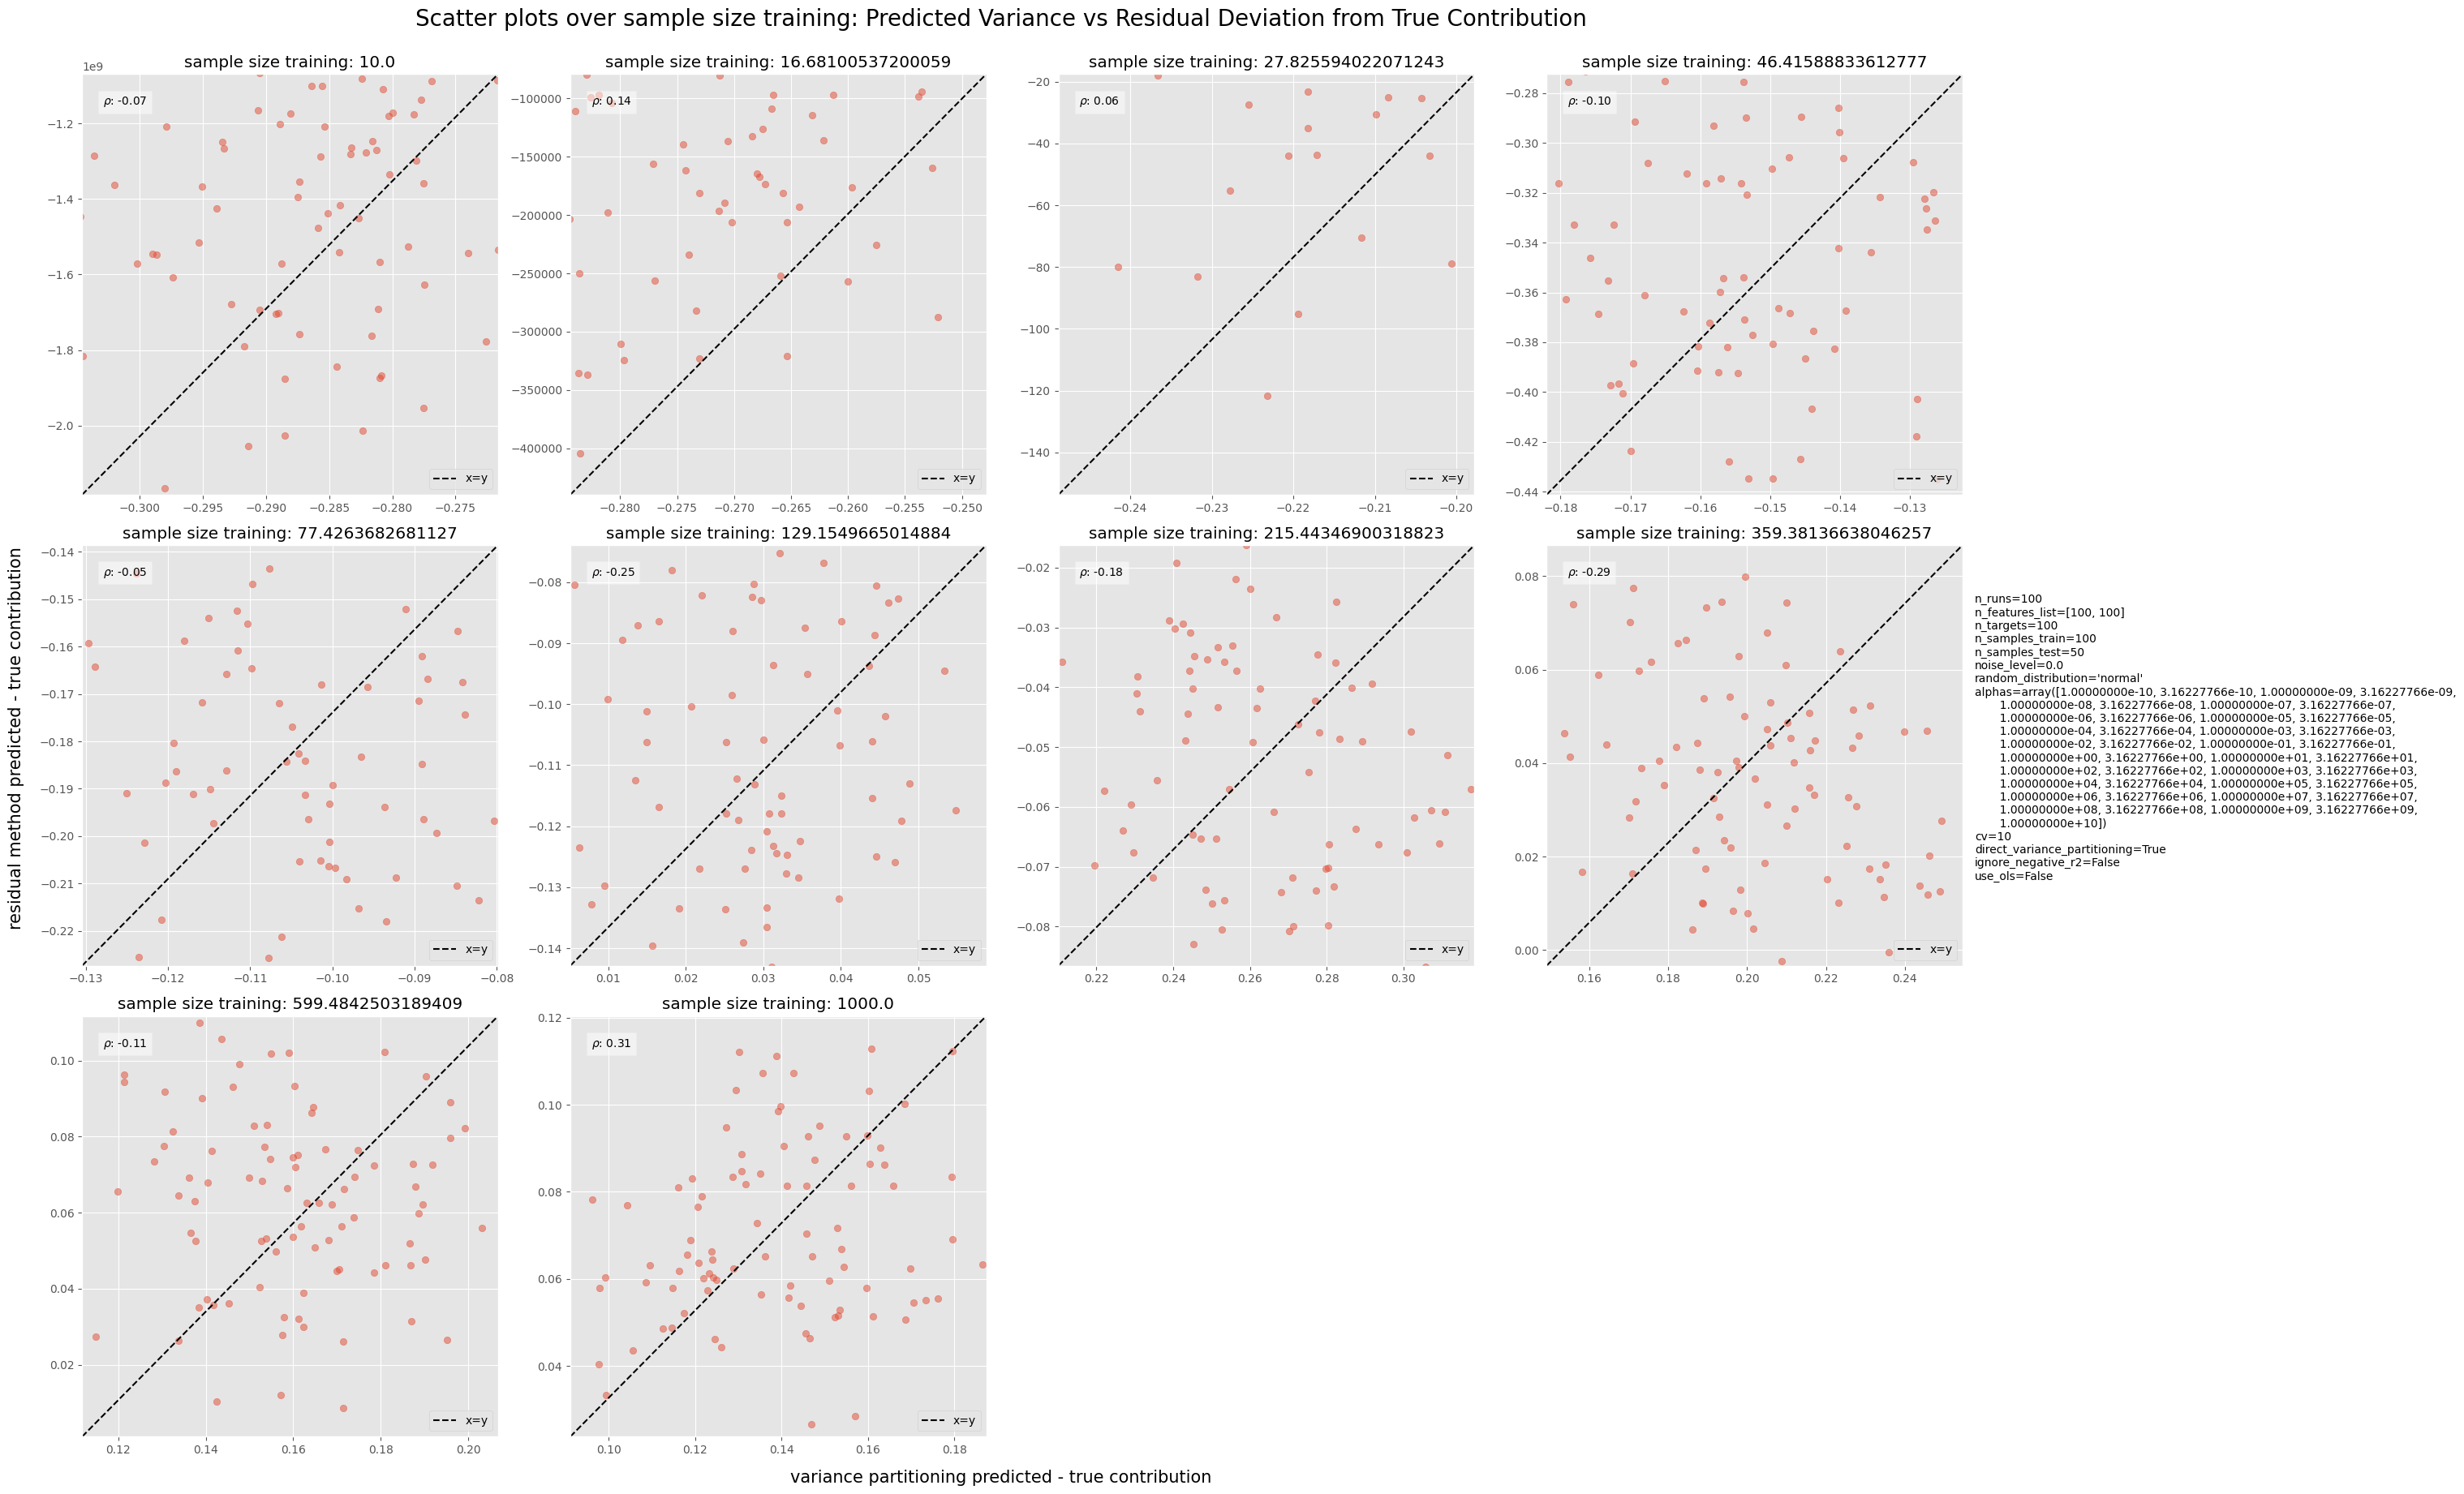

In [26]:
plot_experiment(sample_sizes, variable_name, predicted_variance, predicted_residual, x_is_log=True, **variables)

## varying test sample sizes

In [27]:
variable_name = "sample size testing"

In [28]:
predicted_variance, predicted_residual = run_experiment(sample_sizes, variable_name, **variables)

[........................................] 100% | 666.73 sec | Varying sample size testing | 


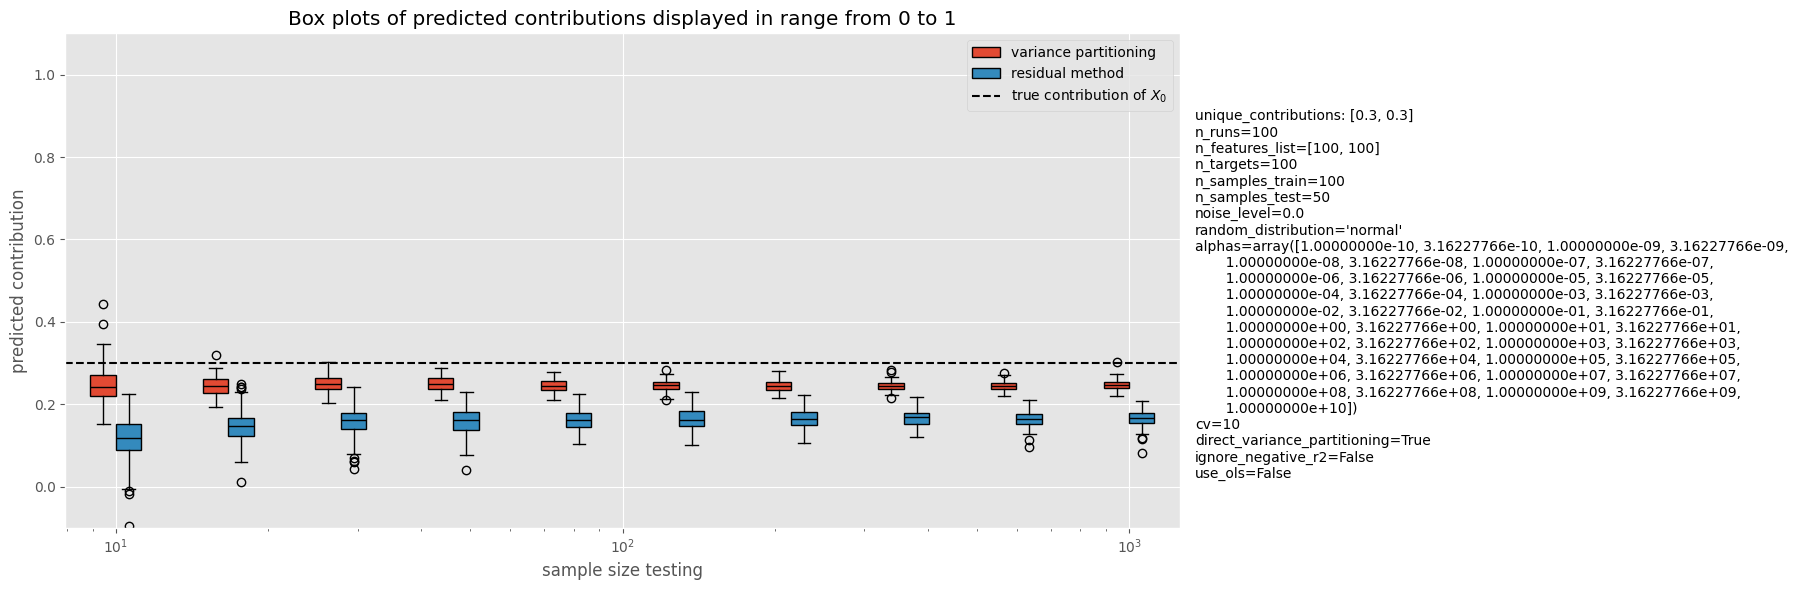

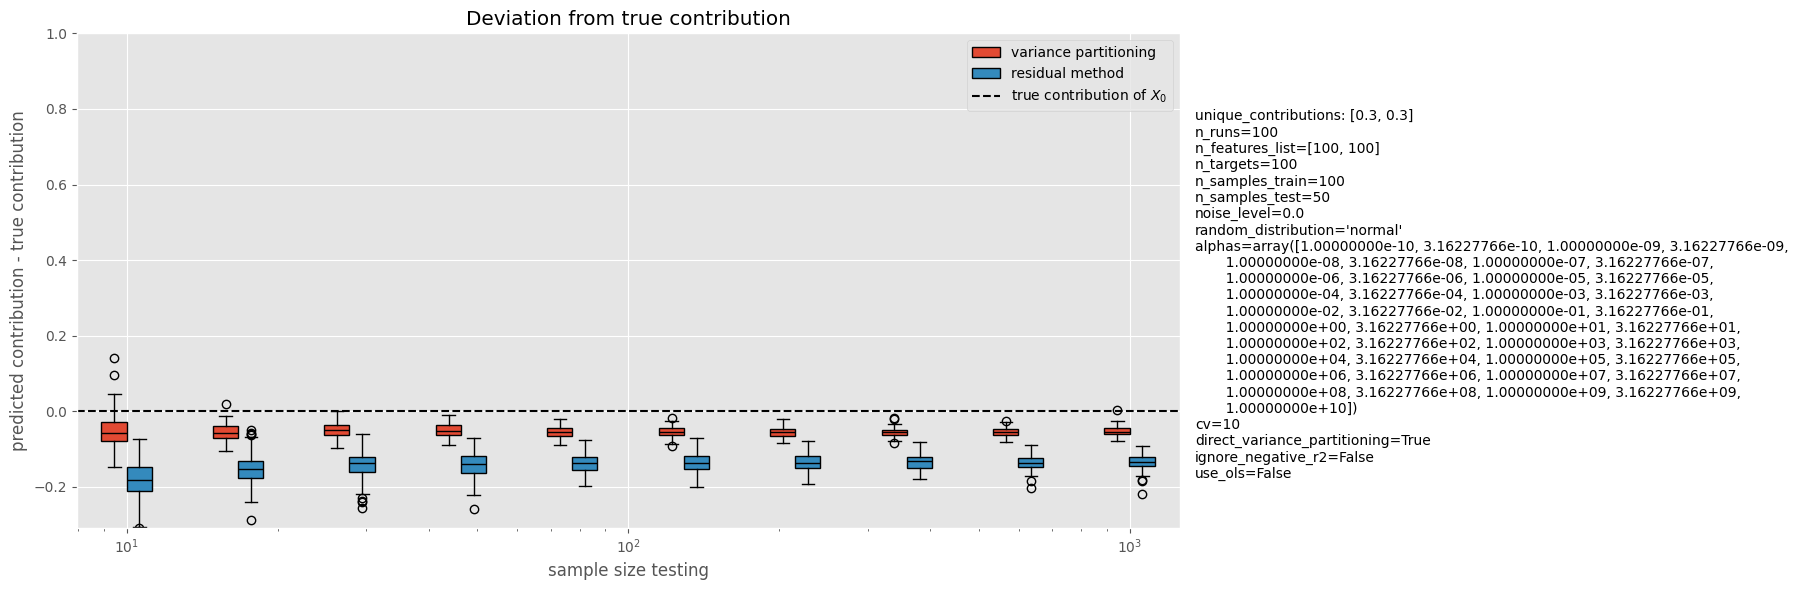

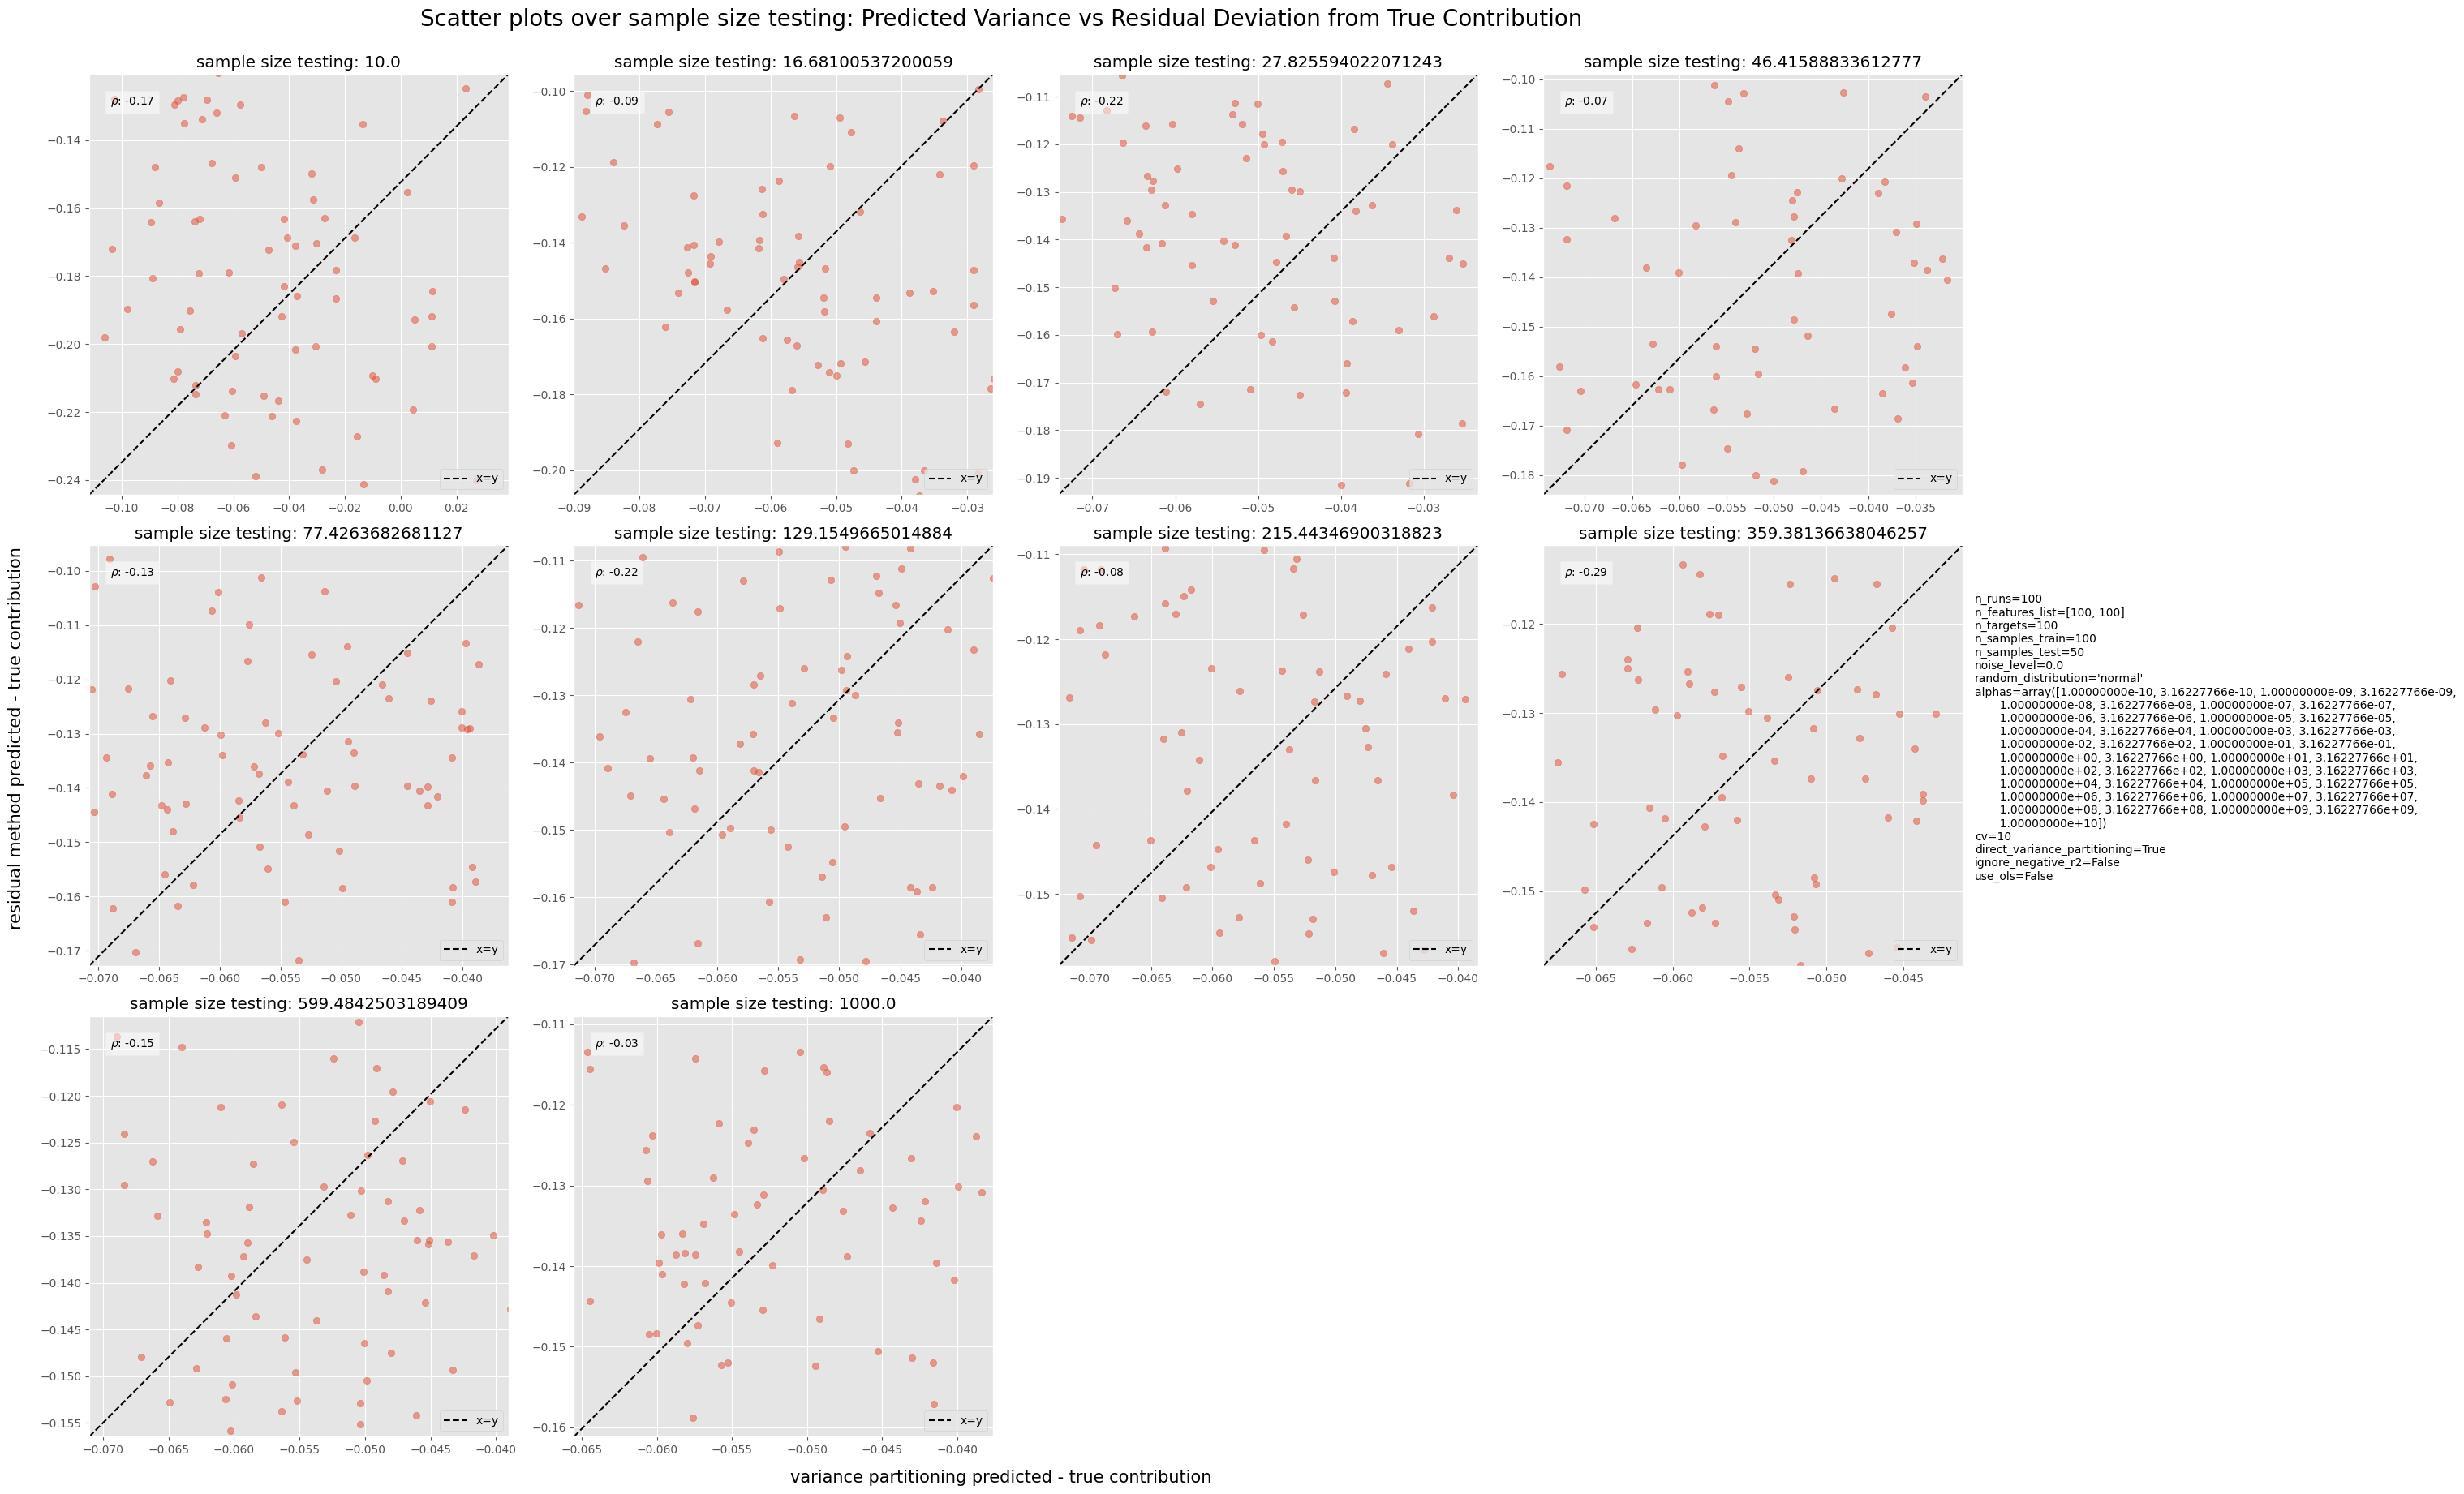

In [29]:
plot_experiment(sample_sizes, variable_name, predicted_variance, predicted_residual, x_is_log=True, **variables)

# Test varying feature sizes

In [36]:
feature_sizes = np.logspace(0, 3, n_observations)

## only $X_0$

In [37]:
variable_name = "number of features $X_{0}$"

In [38]:
predicted_variance, predicted_residual = run_experiment(feature_sizes, variable_name, **variables)

[........................................] 100% | 609.53 sec | Varying number of features $X_{0}$ | 


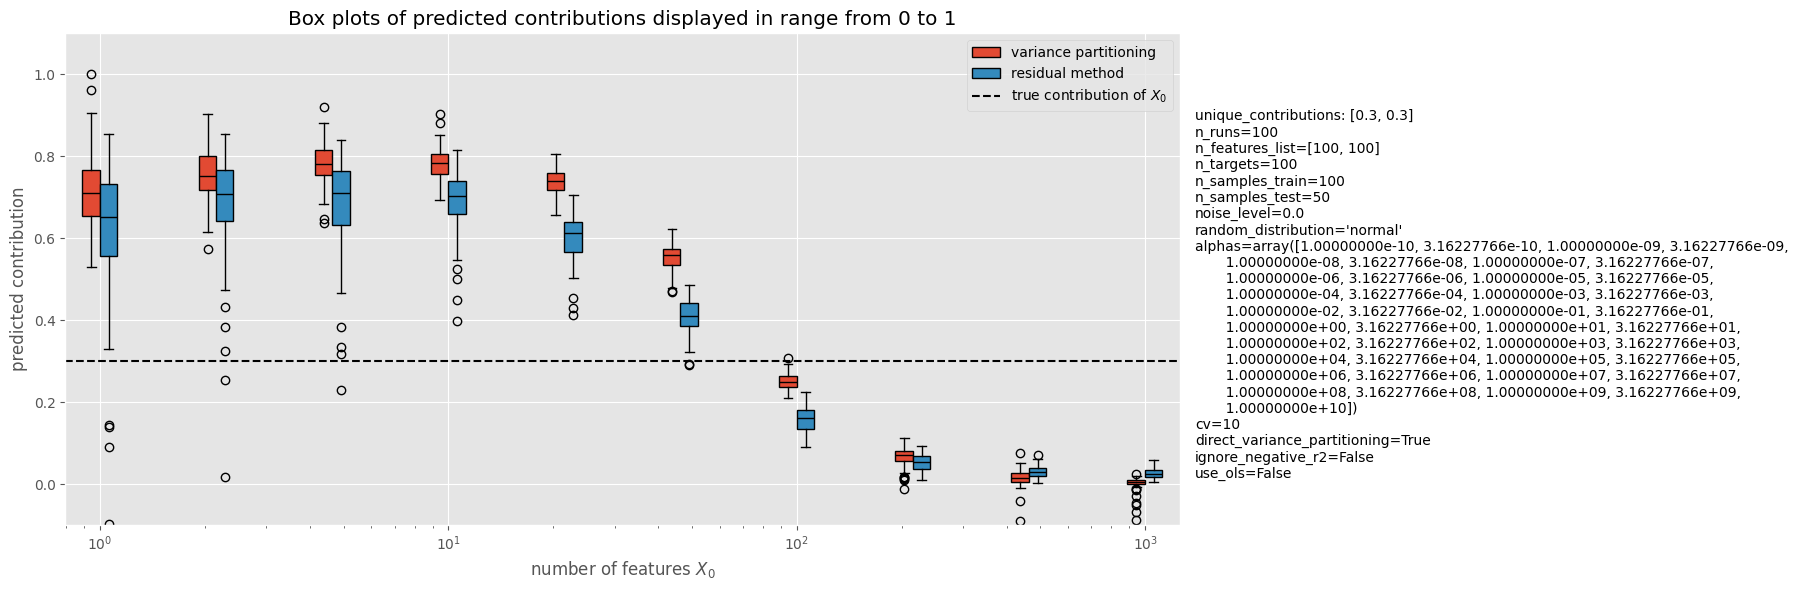

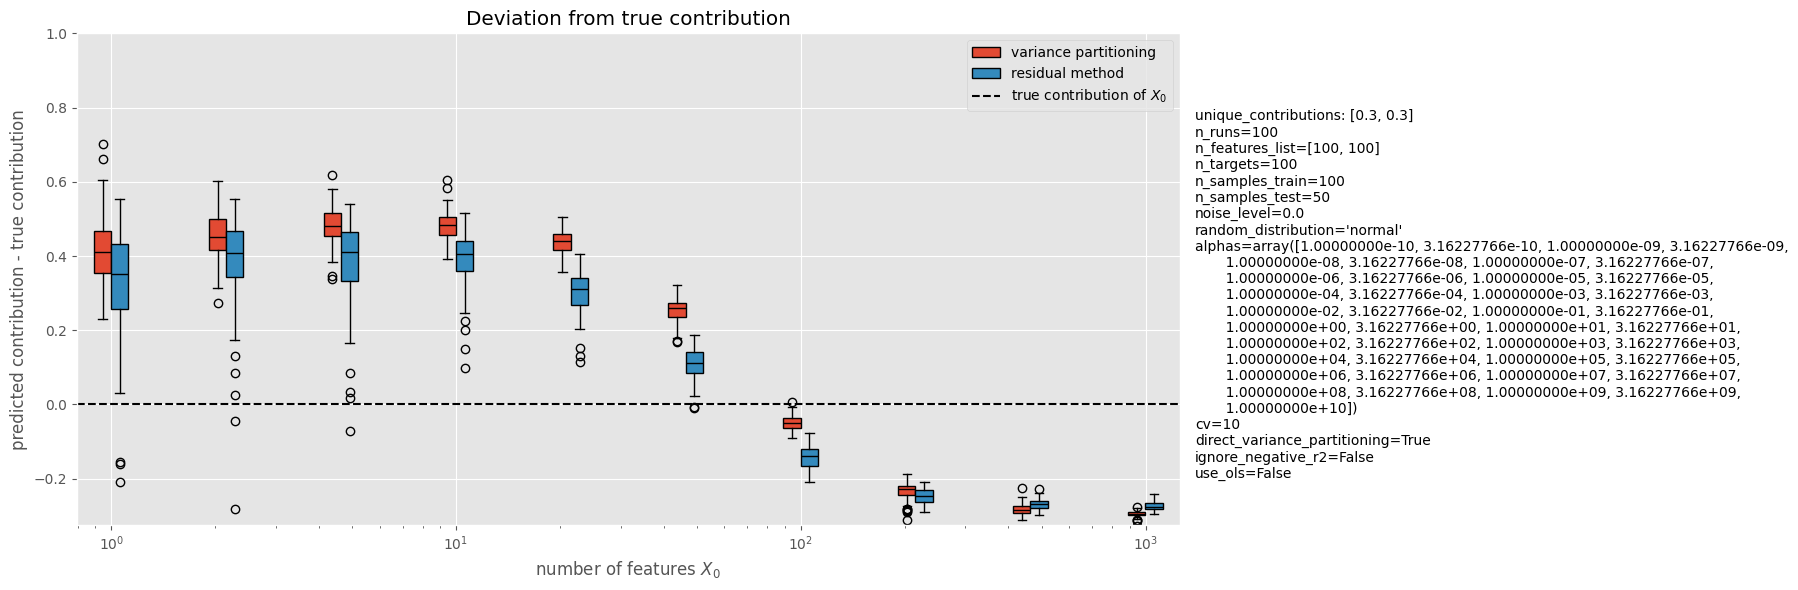

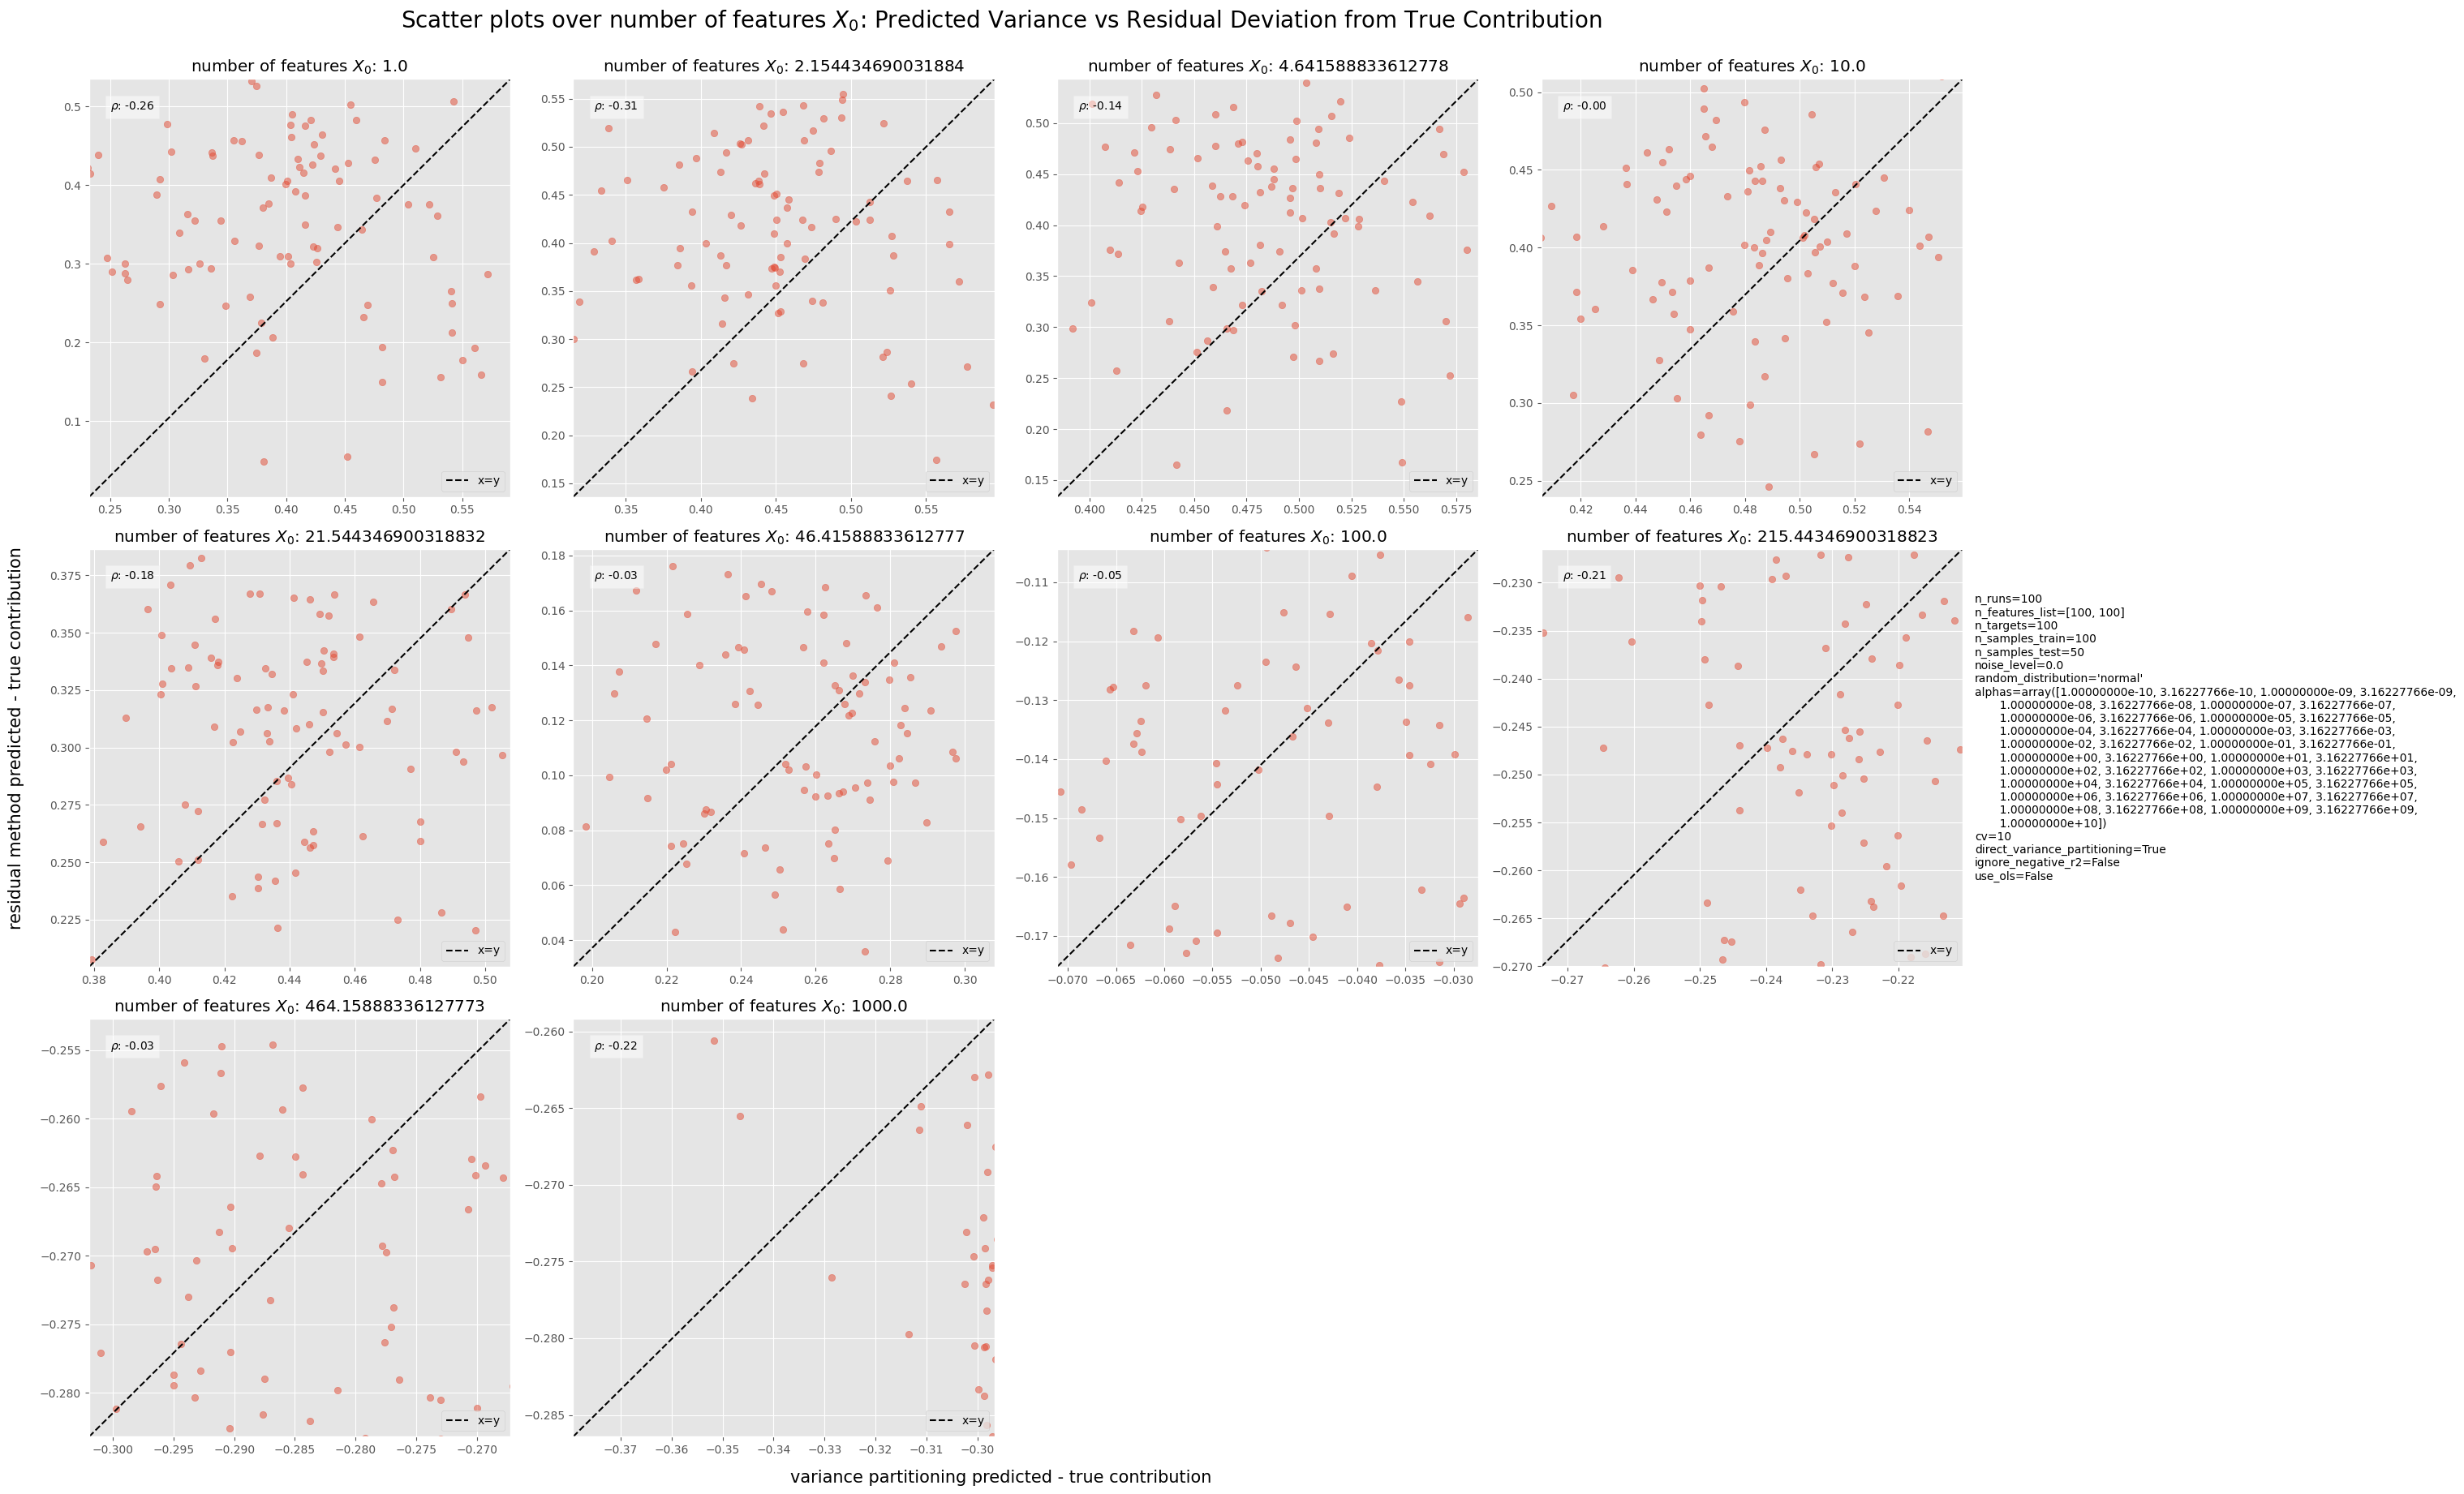

In [39]:
plot_experiment(feature_sizes, variable_name, predicted_variance, predicted_residual, x_is_log=True, **variables)

## both $X_0$ and $X_1$

In [40]:
variable_name = "number of features $X_{0,1}$"

In [41]:
predicted_variance, predicted_residual = run_experiment(feature_sizes, variable_name, **variables)

[........................................] 100% | 440.14 sec | Varying number of features $X_{0,1}$ | 


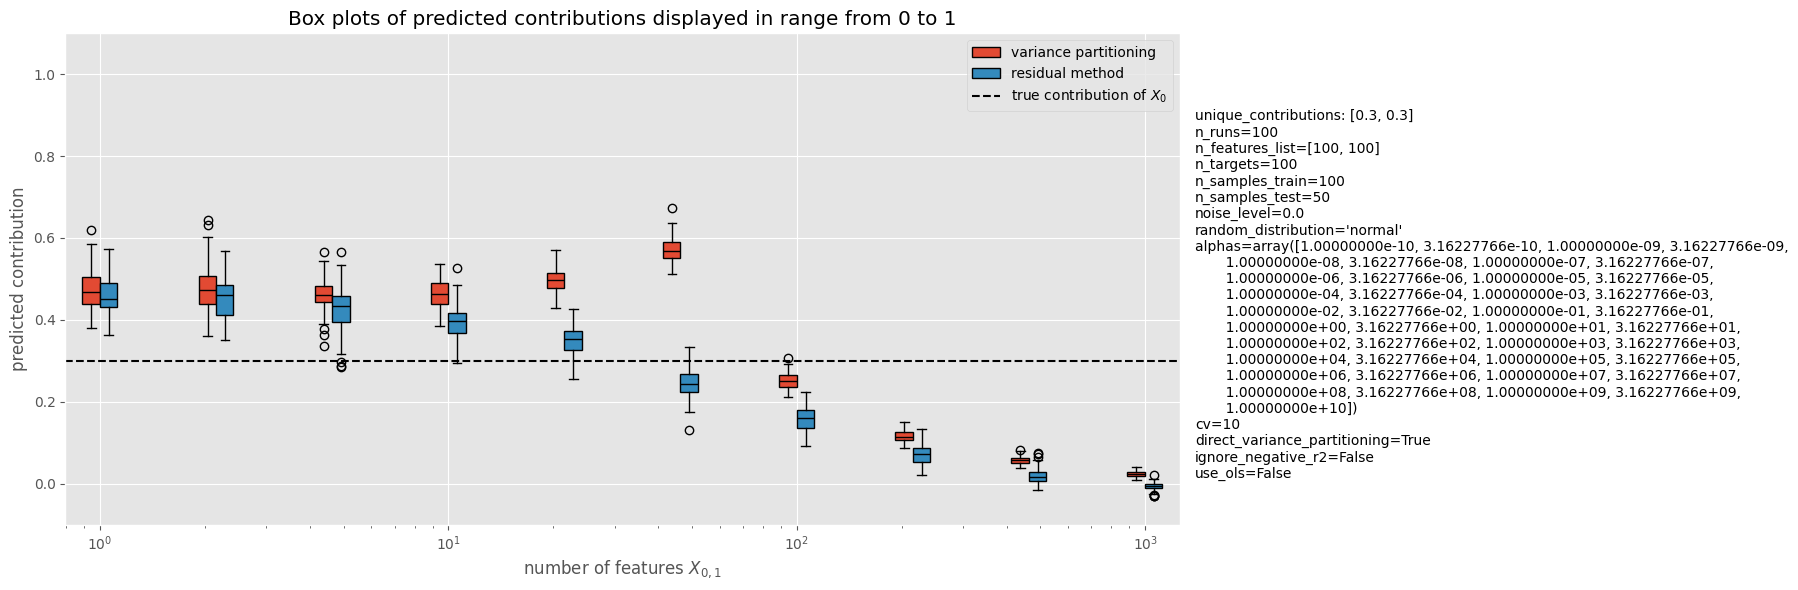

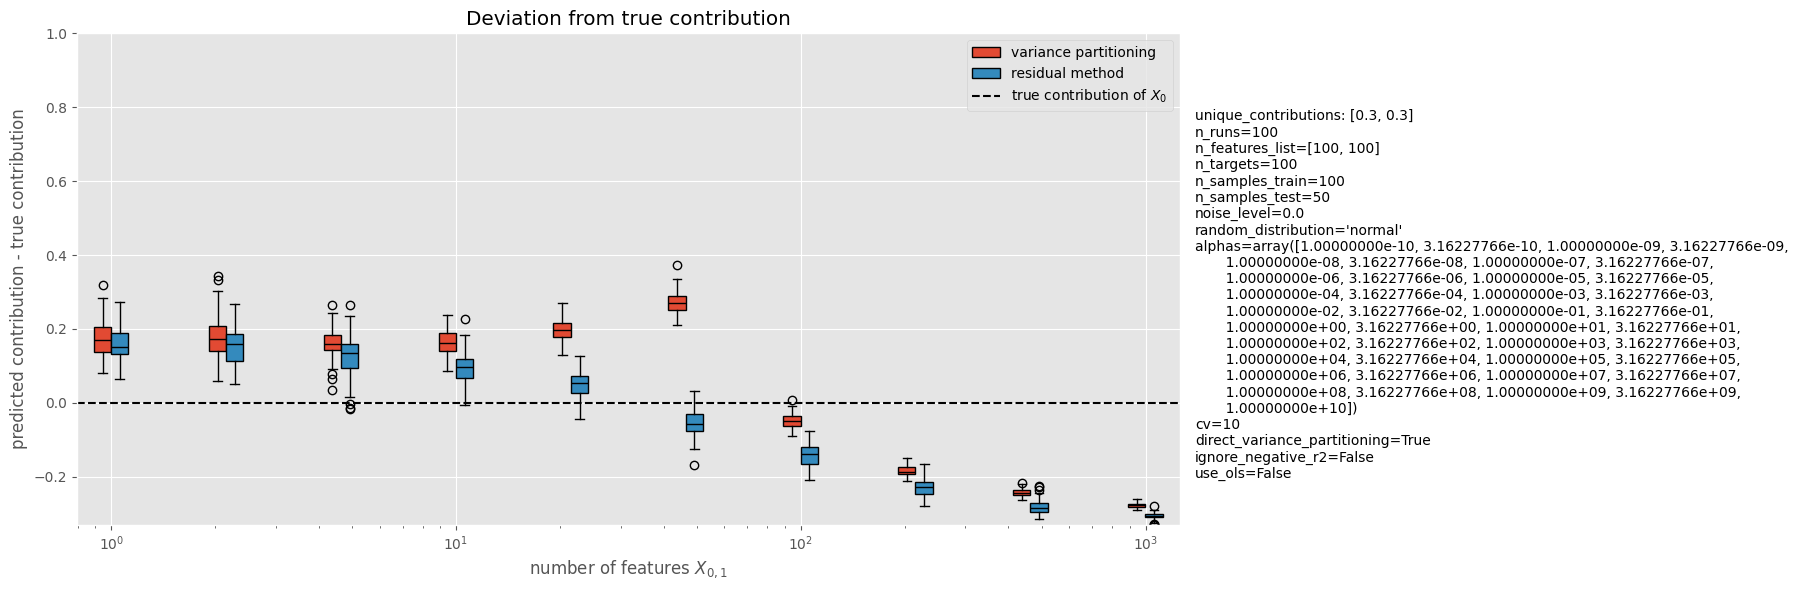

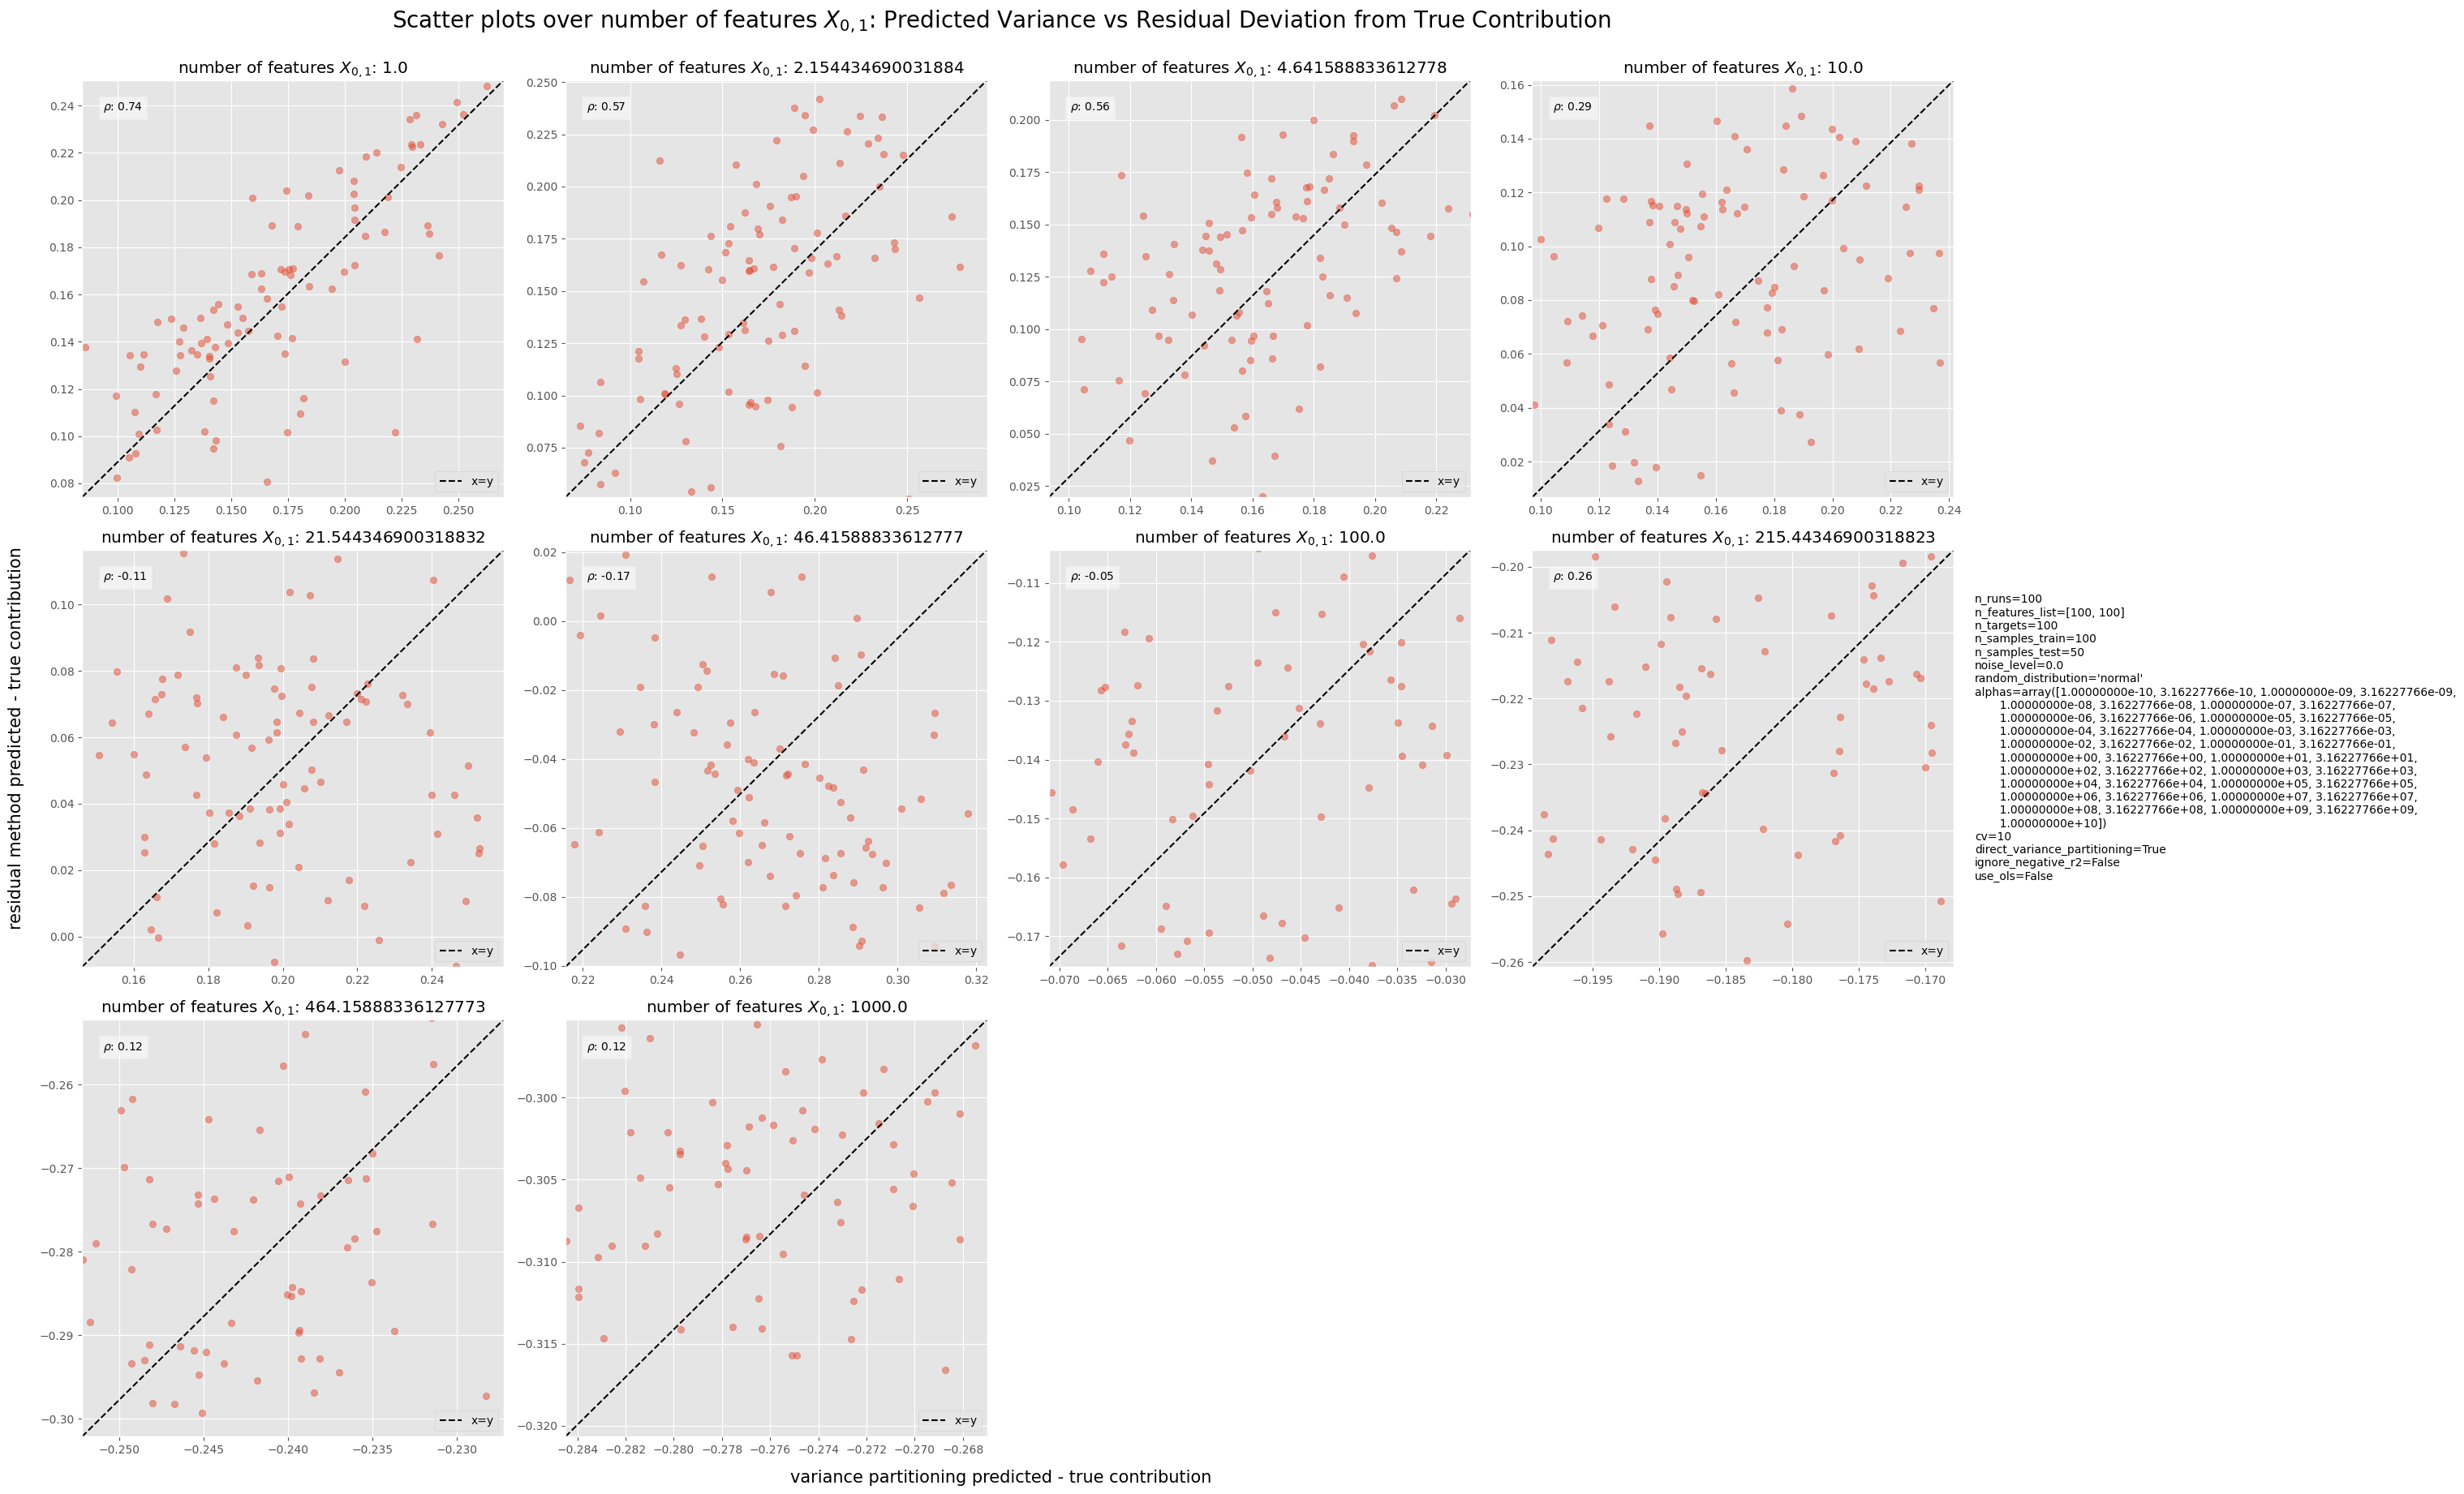

In [42]:
plot_experiment(feature_sizes, variable_name, predicted_variance, predicted_residual, x_is_log=True, **variables)

# varying target size

In [43]:
variable_name = "number of targets"
target_sizes = np.logspace(0, 4, n_observations)

In [44]:
predicted_variance, predicted_residual = run_experiment(target_sizes, variable_name, **variables)

[........................................] 100% | 727.42 sec | Varying number of targets | 


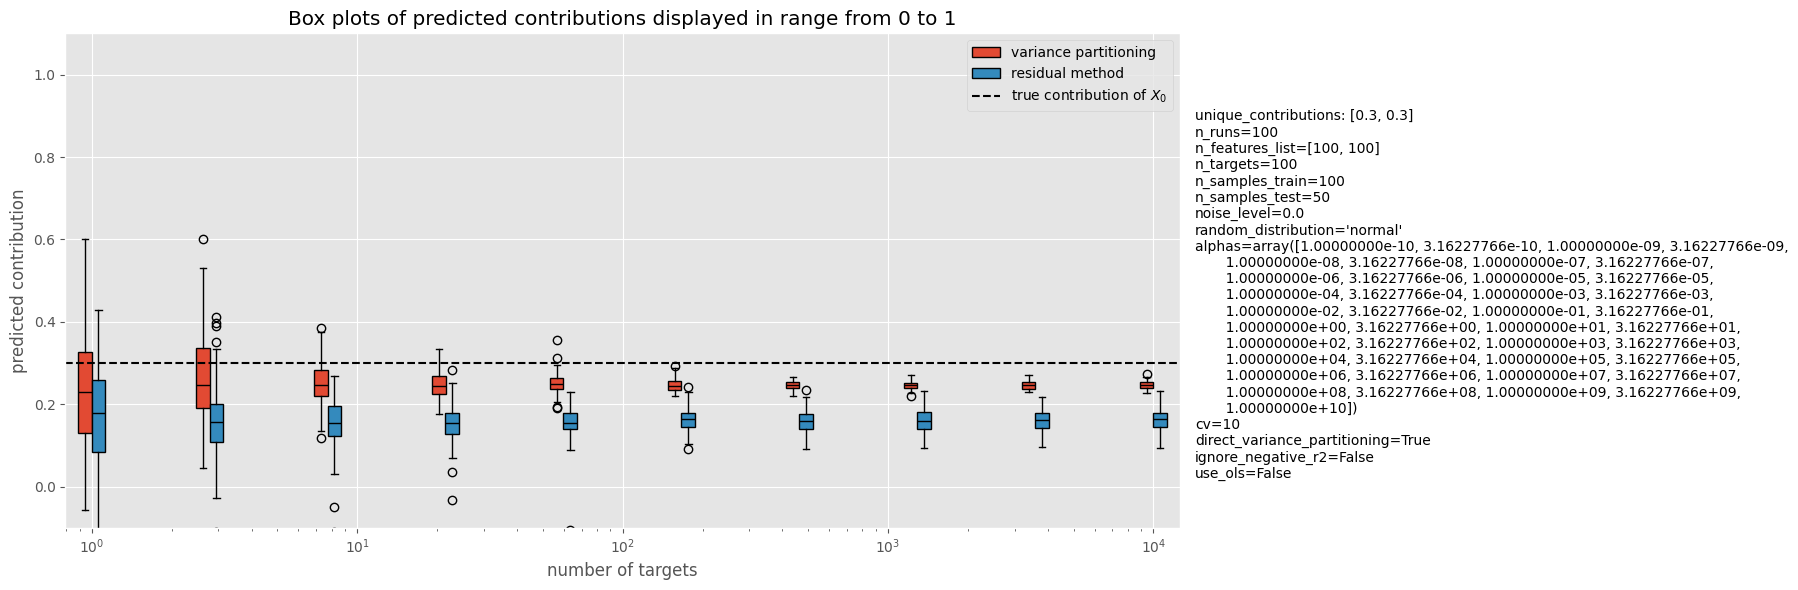

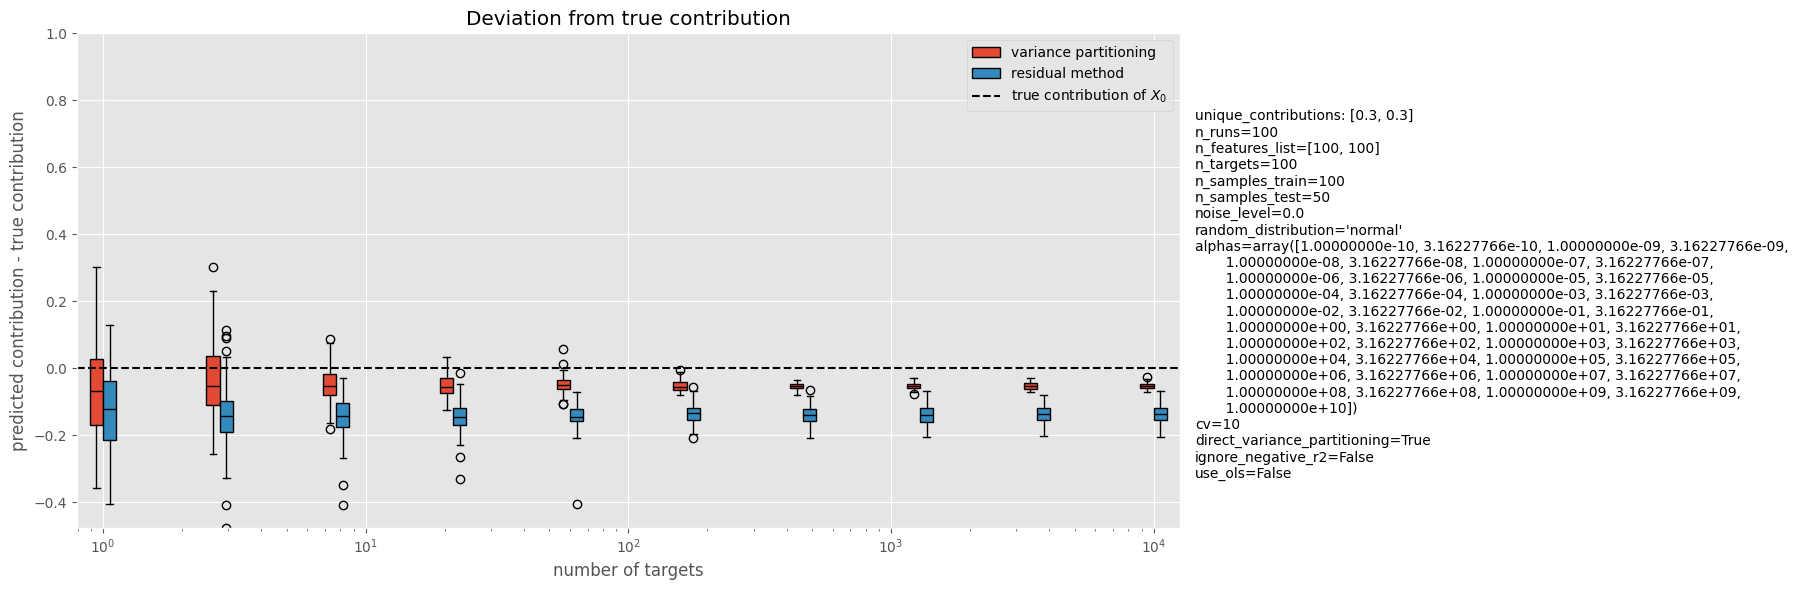

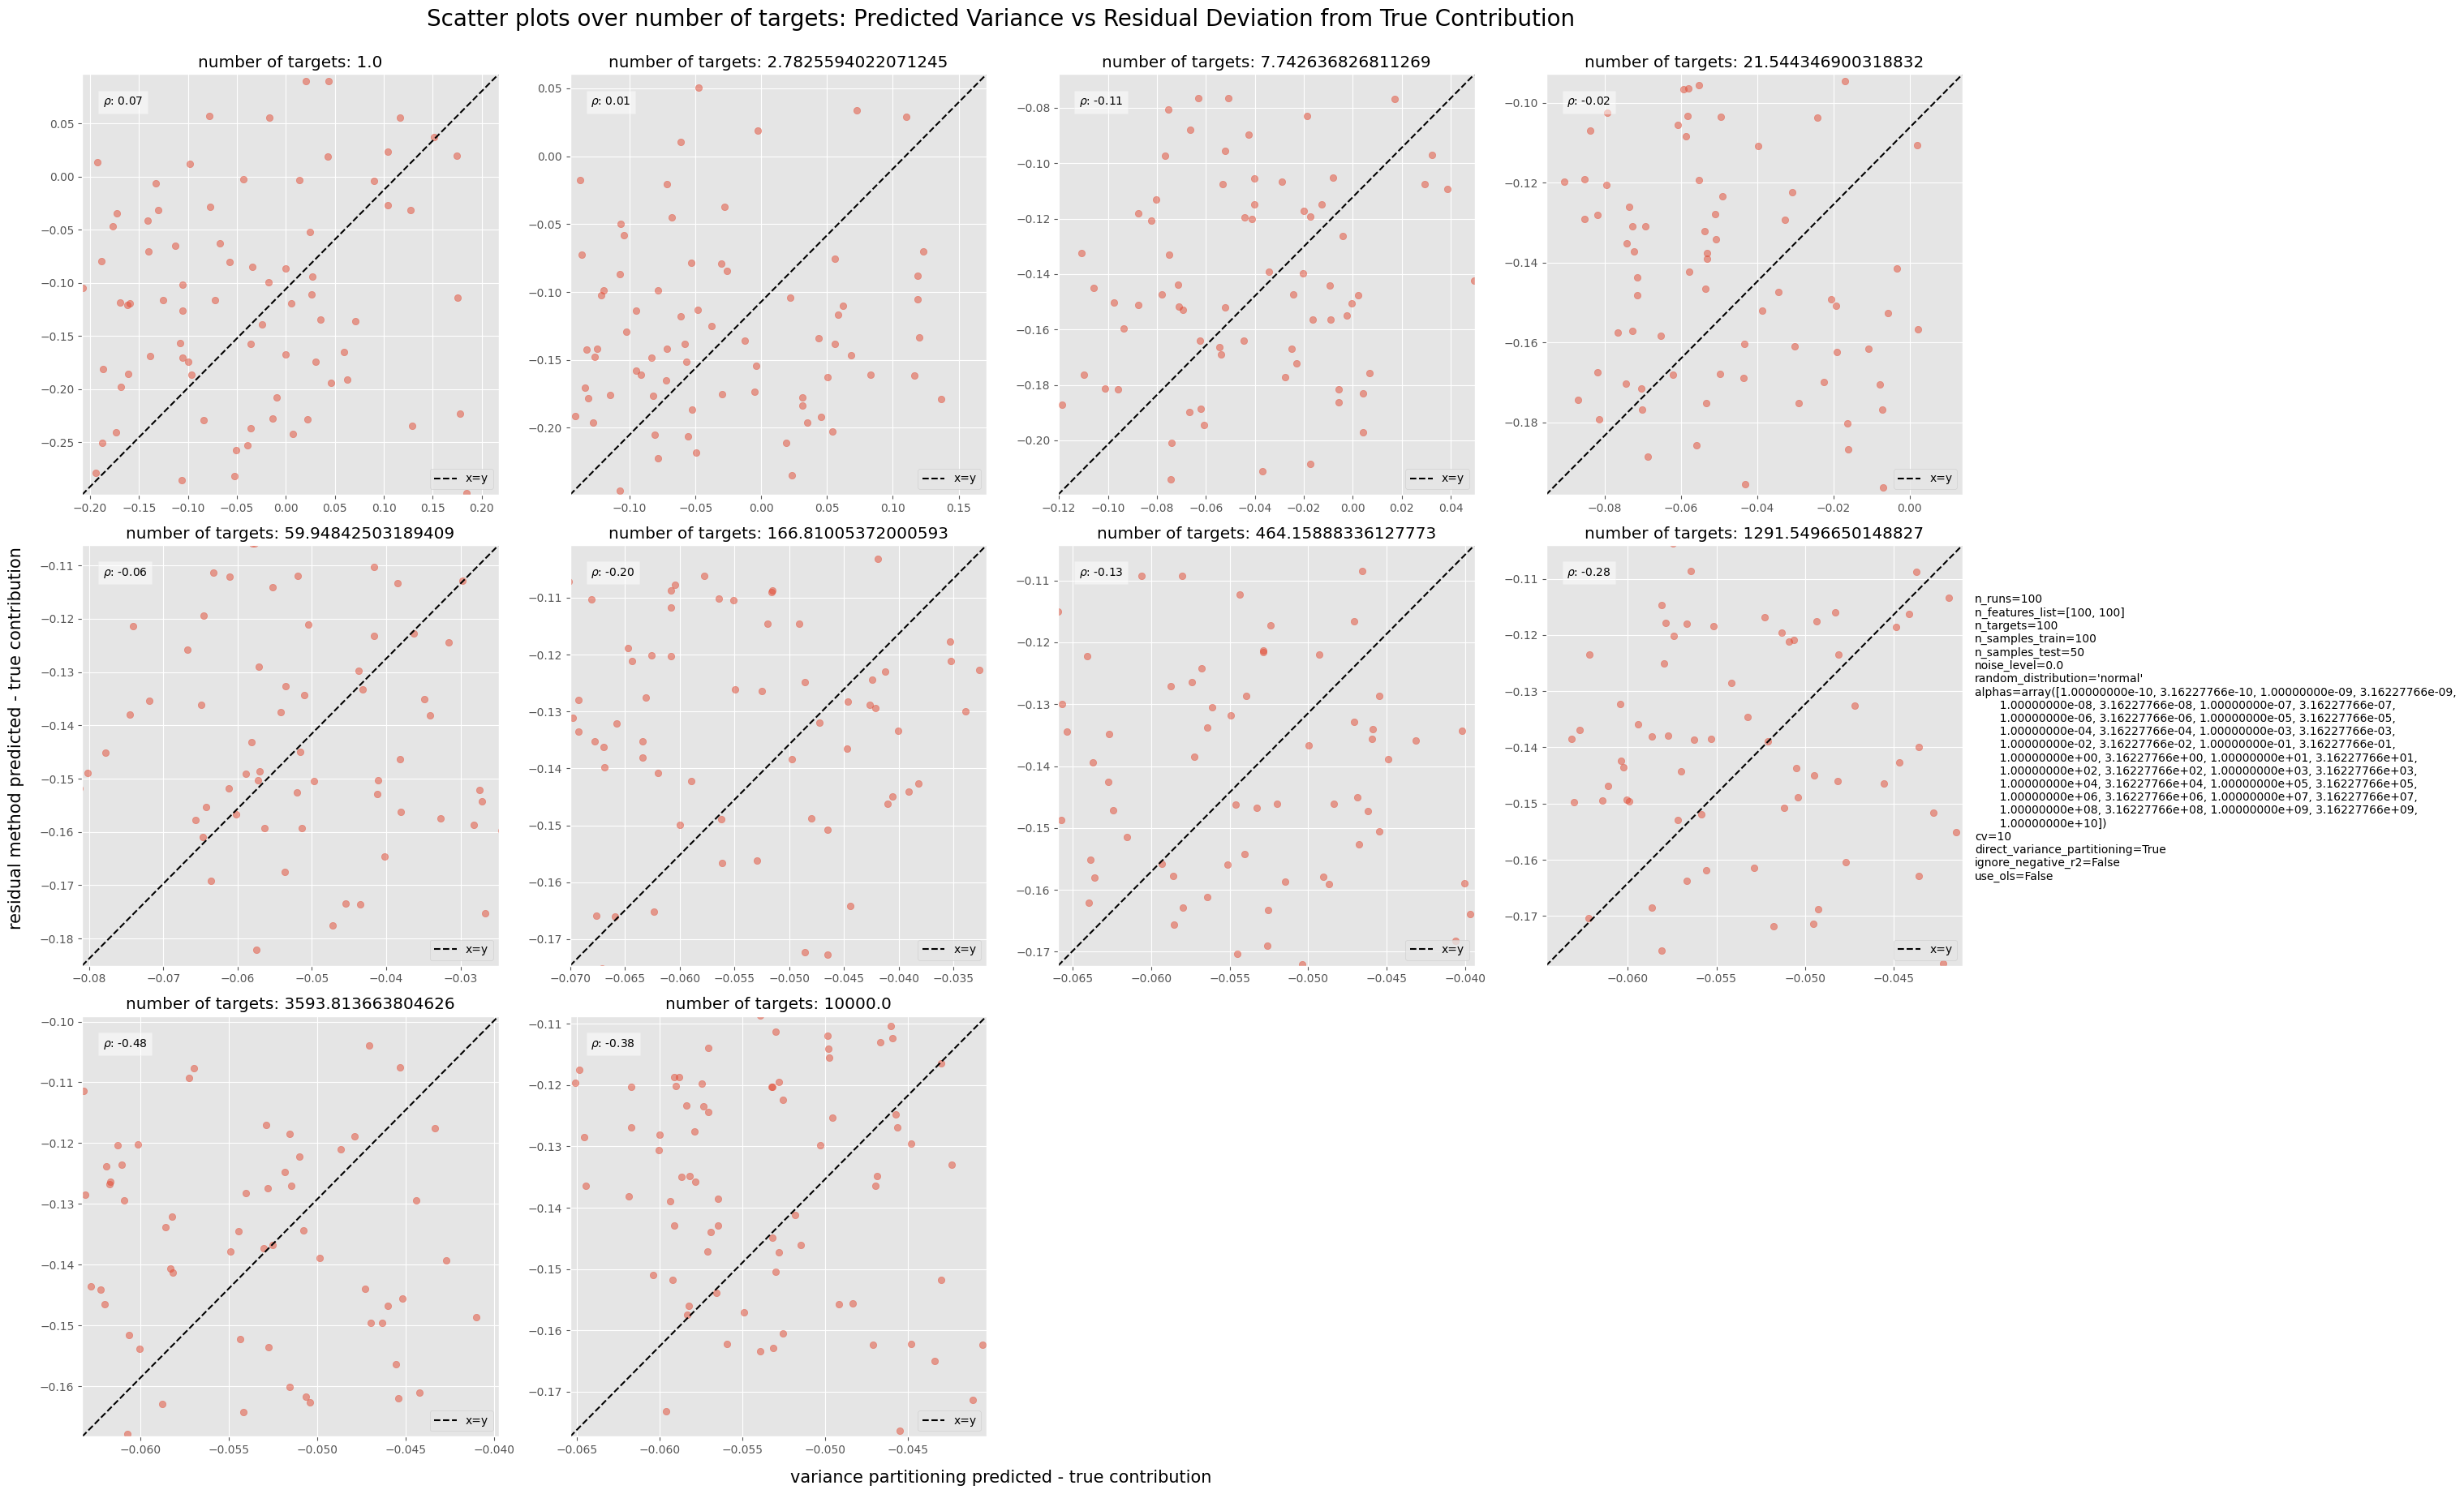

In [45]:
plot_experiment(target_sizes, variable_name, predicted_variance, predicted_residual, x_is_log=True, **variables)

# Test varying noise levels

In [46]:
variable_name = "relative amount of noise in the target"
noise_levels = np.linspace(0, 1, n_observations)

In [47]:
predicted_variance, predicted_residual = run_experiment(noise_levels, variable_name, **variables)

[........................................] 100% | 631.55 sec | Varying relative amount of noise in the target | 


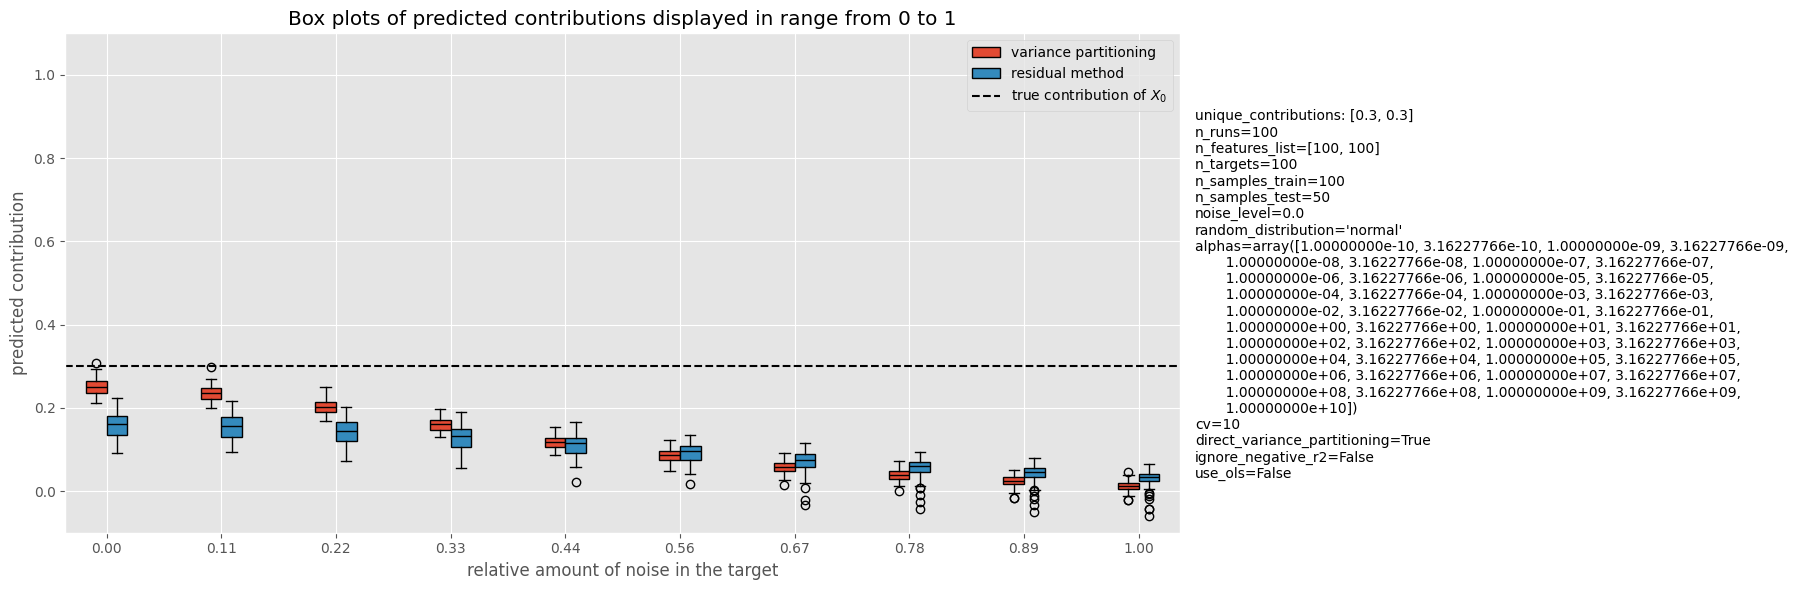

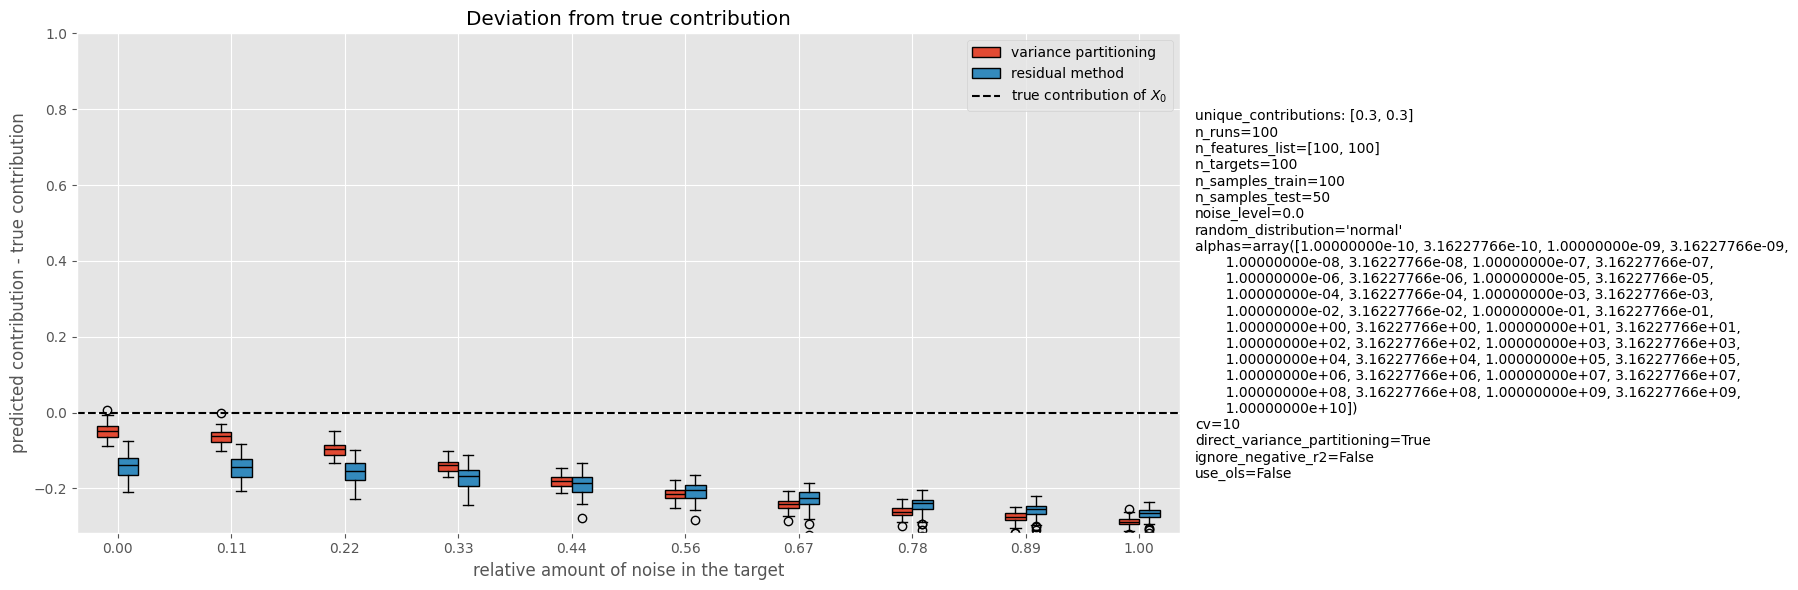

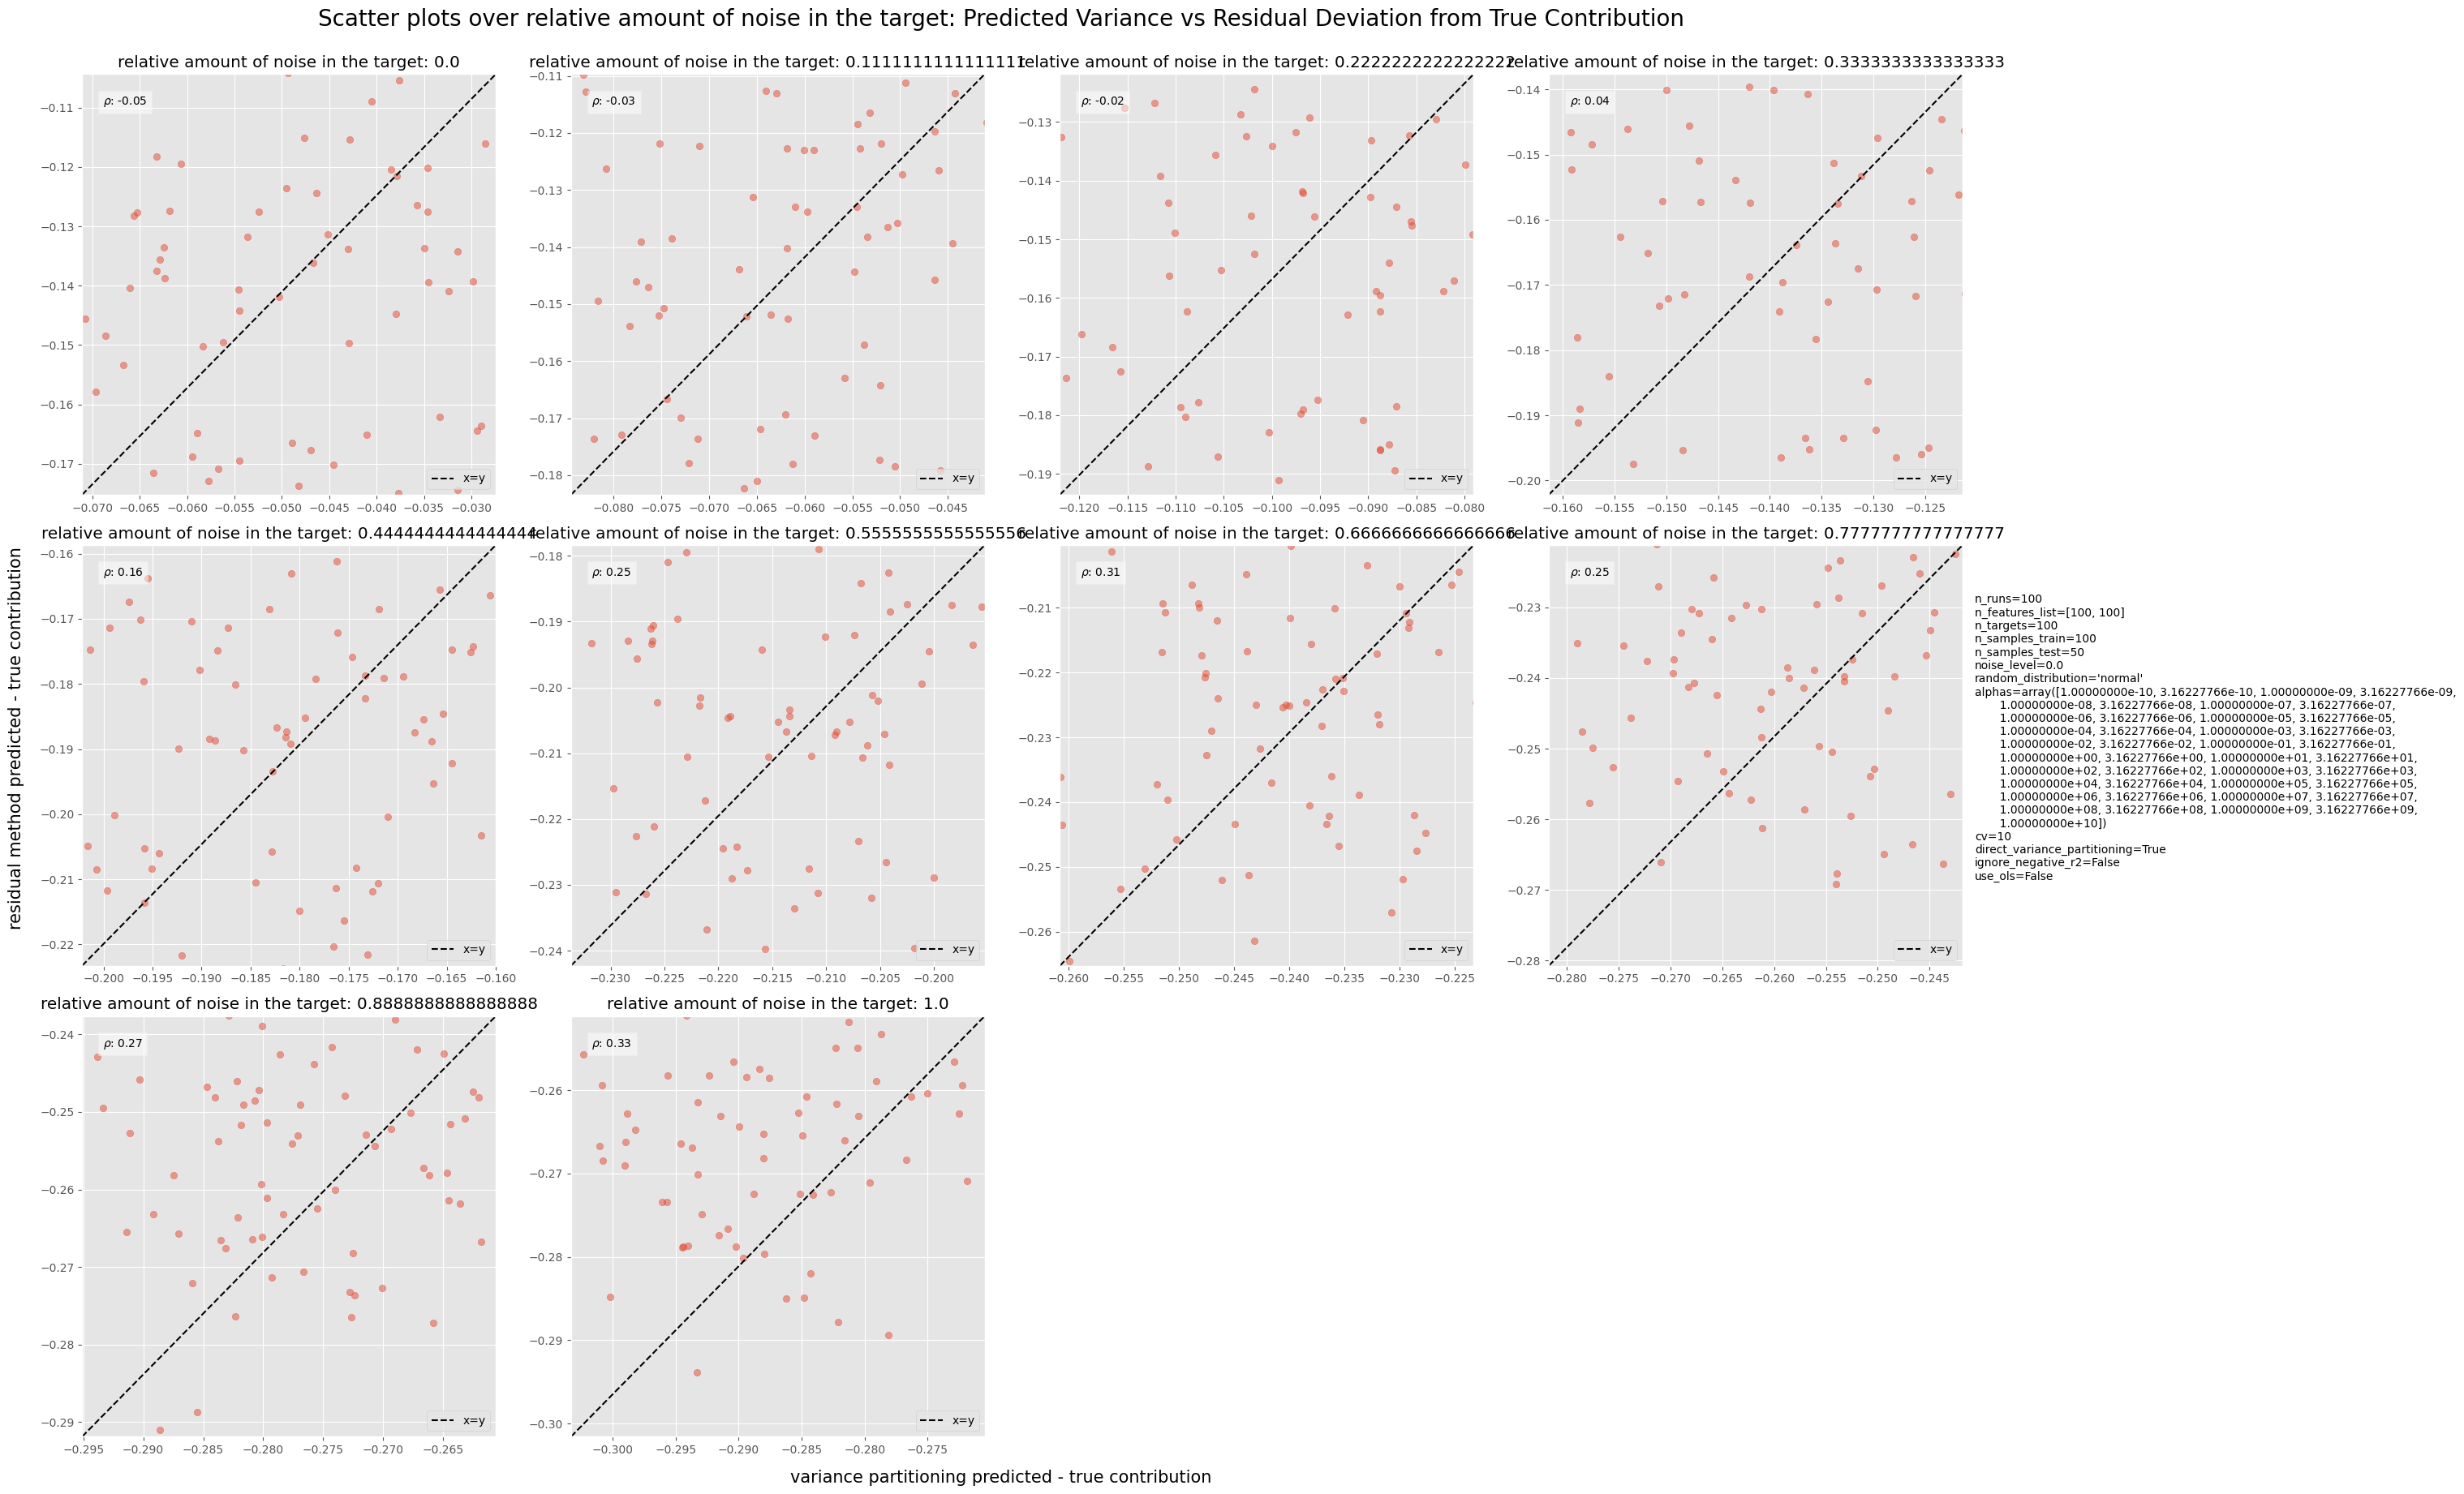

In [48]:
plot_experiment(noise_levels, variable_name, predicted_variance, predicted_residual, **variables)

# Test varying unique contributions of $X_0$ and $X_1$

In [49]:
variable_name = "proportions of unique contribution"
x0_unique_contributions = np.linspace(0, 1, n_observations)
# convert from np to python
x0_unique_contributions = [round(float(x), 2) for x in x0_unique_contributions]

[........................................] 100% | 632.06 sec | Varying proportions of unique contribution | 


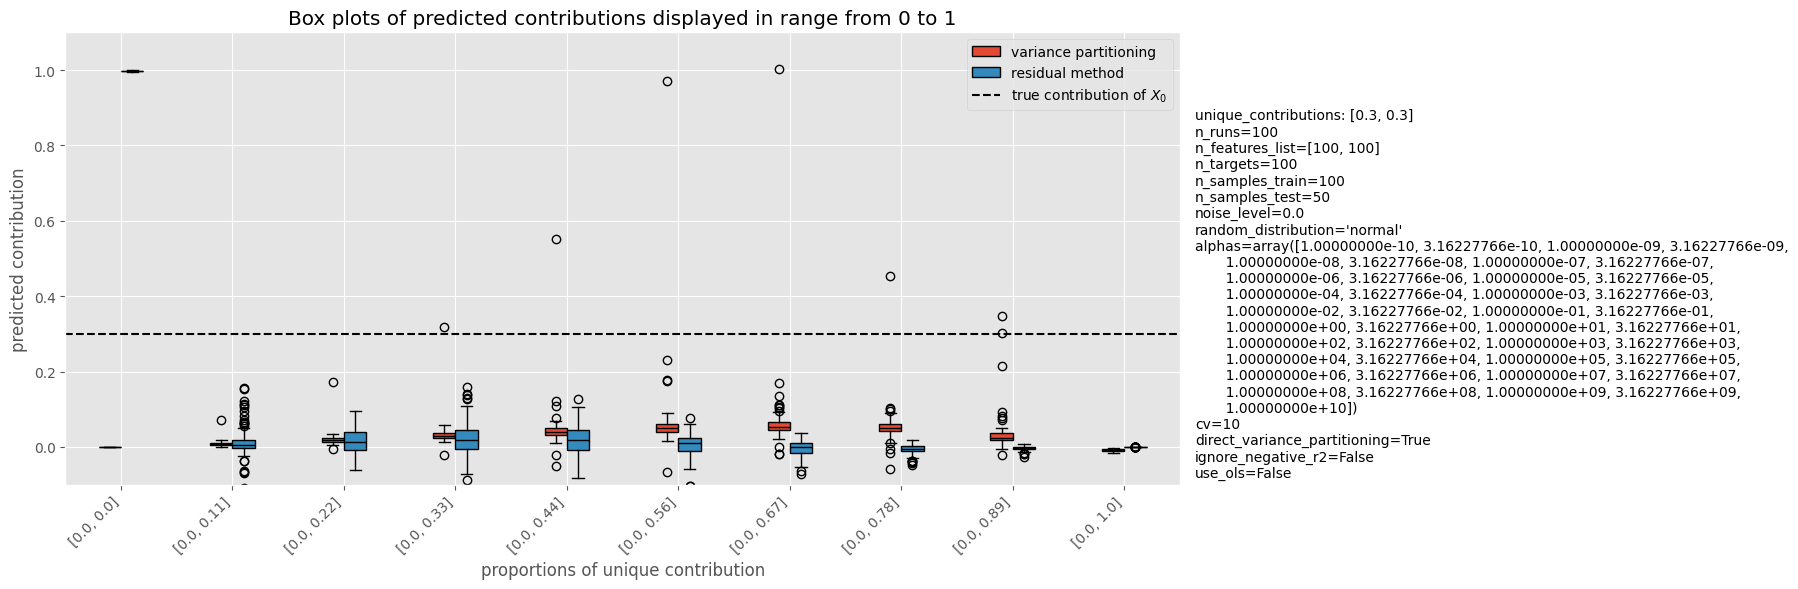

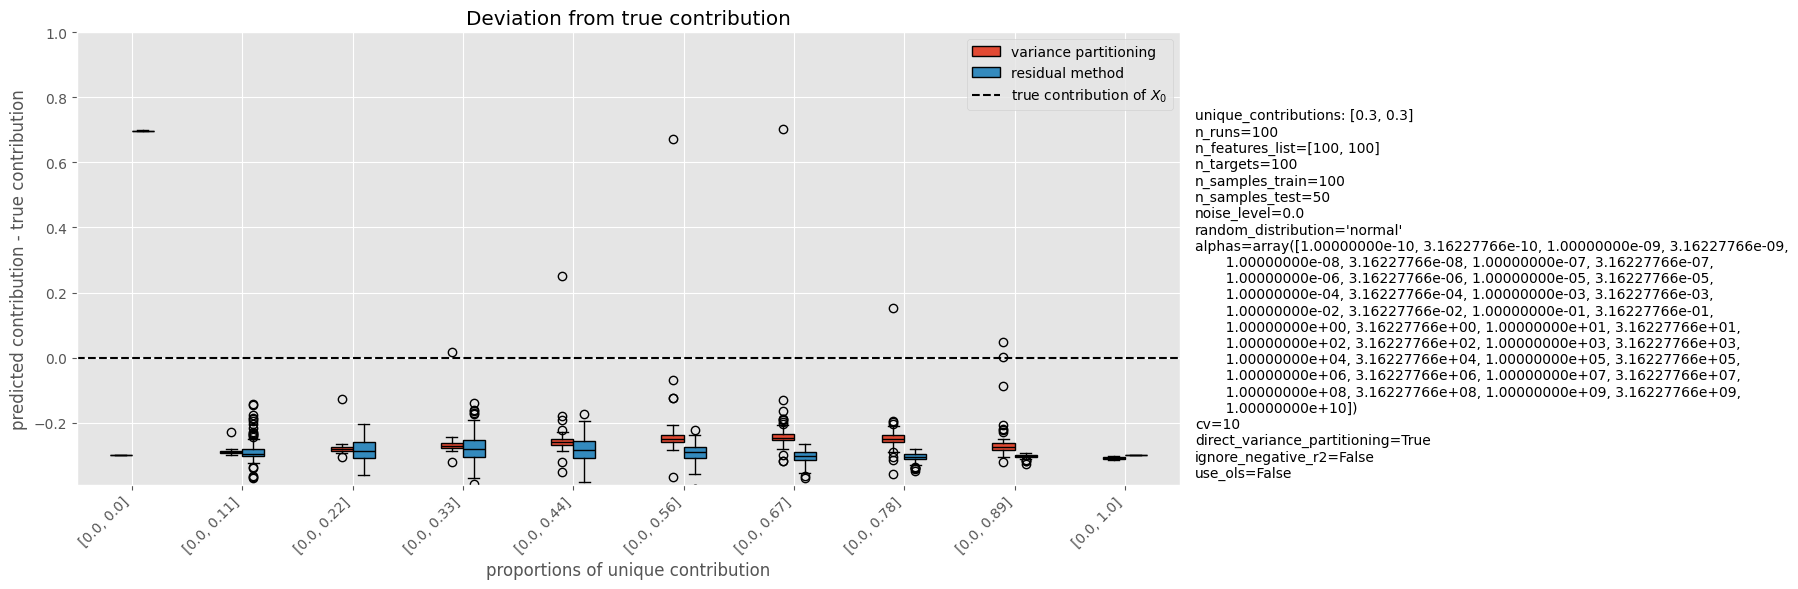

TypeError: can only concatenate str (not "list") to str

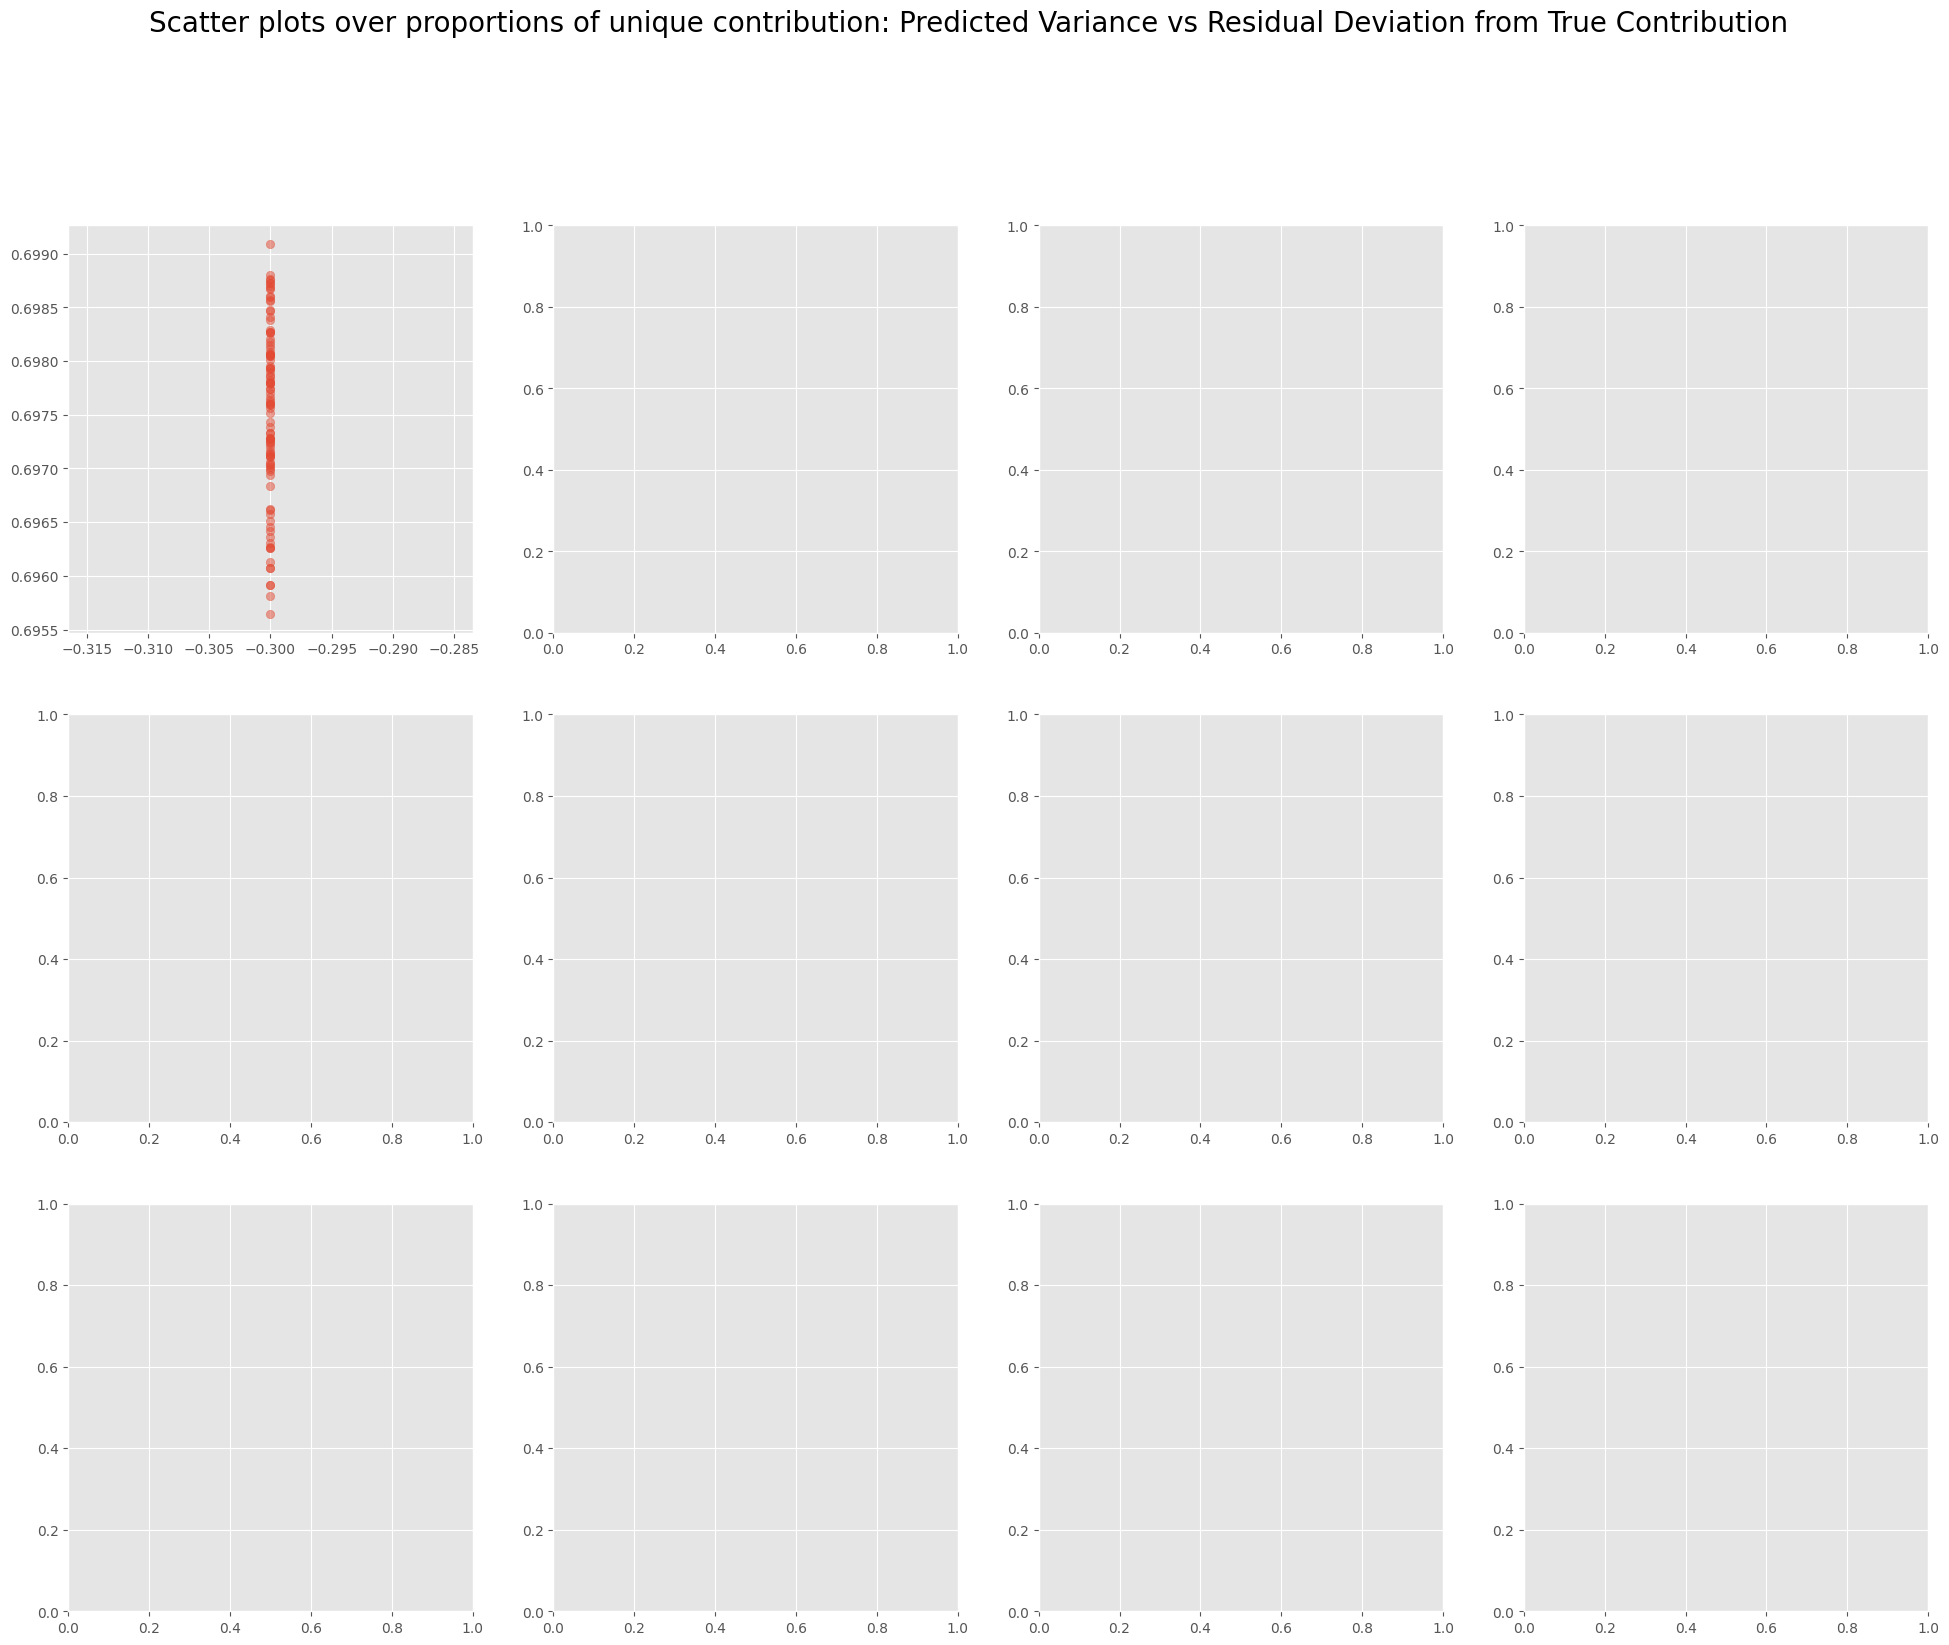

In [50]:
for x0_unique_contribution in x0_unique_contributions:
    contributions = [[x0_unique_contribution, round((1 - x0_unique_contribution) * x1 / (n_observations - 1), 2)] for
                     x1 in range(n_observations)]
    predicted_variance, predicted_residual = run_experiment(contributions, variable_name, **variables)
    plot_experiment(contributions, variable_name, predicted_variance, predicted_residual, **variables)